In [1]:
#Import the relevant libraries to load and view the data

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Read in the dataset (both the variables and the labels to predict)
data = pd.read_csv('data/training_set_features.csv', index_col=0)
labels = pd.read_csv('data/training_set_labels.csv', index_col=0)

In [3]:
#Display the columns and first few rows of the data
print('Training data shape: ', data.shape)
data.head()

Training data shape:  (26707, 35)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
#Display the columns and first few rows of the labels
print('Labels shape: ', labels.shape)
labels.head()

Labels shape:  (26707, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [5]:
#convert labels to be floats like the other variables
labels = pd.DataFrame(np.array(labels), columns=labels.columns)
labels[['seasonal_vaccine','h1n1_vaccine']] = labels[['seasonal_vaccine','h1n1_vaccine']].astype(float)
labels.dtypes

h1n1_vaccine        float64
seasonal_vaccine    float64
dtype: object

In [6]:
#Extract a list of the columns with numeric data
cols_numeric = list(data.columns[data.dtypes == "float64"].values)
print(cols_numeric)

['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']


In [7]:
#Print out value counts for each variable (so we can see the distribution as well as the number of NaN entries)
for col in data.columns.values:
    print(" ")
    print("Column: ", col)
    
    print(data[col].value_counts(dropna=False))
    print(" ")

 
Column:  h1n1_concern
2.0    10575
1.0     8153
3.0     4591
0.0     3296
NaN       92
Name: h1n1_concern, dtype: int64
 
 
Column:  h1n1_knowledge
1.0    14598
2.0     9487
0.0     2506
NaN      116
Name: h1n1_knowledge, dtype: int64
 
 
Column:  behavioral_antiviral_meds
0.0    25335
1.0     1301
NaN       71
Name: behavioral_antiviral_meds, dtype: int64
 
 
Column:  behavioral_avoidance
1.0    19228
0.0     7271
NaN      208
Name: behavioral_avoidance, dtype: int64
 
 
Column:  behavioral_face_mask
0.0    24847
1.0     1841
NaN       19
Name: behavioral_face_mask, dtype: int64
 
 
Column:  behavioral_wash_hands
1.0    22015
0.0     4650
NaN       42
Name: behavioral_wash_hands, dtype: int64
 
 
Column:  behavioral_large_gatherings
0.0    17073
1.0     9547
NaN       87
Name: behavioral_large_gatherings, dtype: int64
 
 
Column:  behavioral_outside_home
0.0    17644
1.0     8981
NaN       82
Name: behavioral_outside_home, dtype: int64
 
 
Column:  behavioral_touch_face
1.0    18001

In [8]:
#Extract a list of the columns with categorical data
cols_cat = list(data.columns[data.dtypes == "object"].values)

#We are excluding these few categorical variables as they have too many distinct values to be compactly one-hot encoded
cols_cat = [elem for elem in cols_cat if elem not in ['hhs_geo_region','employment_industry','employment_occupation']]
cols_cat


['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'census_msa']

In [9]:
#Join the labels columns to the main dataset of variables
data_full = data.join(labels)

cols_numeric = cols_numeric + ['seasonal_vaccine']

In [11]:
#Define a function to plot the rate of h1n1_vaccination (as a stacked bar plot) as a function of the value in one independent variable

def plot_h1n1vac_rate(df, col_name, ax=None, valuecount=True, legend=True):
    
    counts = df[[col_name, 'h1n1_vaccine']].groupby([col_name,'h1n1_vaccine']).size().unstack('h1n1_vaccine')
    counts_sum = counts.sum(axis='columns') #get total occurences of each variable value in 'col_name'
    proportions = counts.div(counts_sum, axis='index') #convert to proportions (of vaccinated = 0 or 1)
    proportions.plot(kind='barh', ax=ax, stacked=True) #plot a stacked bar plot
    
    ax.set_xlabel('h1n1 vaccination rate') #set axis labels
    ax.set_xticks(np.arange(0, 1.1, 0.25))
    ax.set_xticklabels(['0','','0.5','','1'])
    ax.set_ylabel('value')
    ax.set_title(col_name)
    
    if valuecount: #if we're going to show the raw counts for each variable value
        for idx in counts_sum.index: #loop over and plot in white on the right of each stacked bar
            ax.text(0.98, idx, str(counts_sum[idx]), color='w', horizontalalignment='right', verticalalignment='center')
        
    if legend: #for legend plotting
        ax.legend(labels=['h1n1_vaccine=0', 'h1n1_vaccine=1'], loc='lower left')
    else:
        ax.legend().remove()

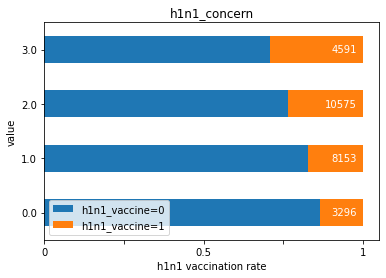

In [12]:
# Plot an example plot showing the vaccination rate for each value of the h1n1_concern variable

fig,ax = plt.subplots()
plot_h1n1vac_rate(data_full, 'h1n1_concern', ax=ax)

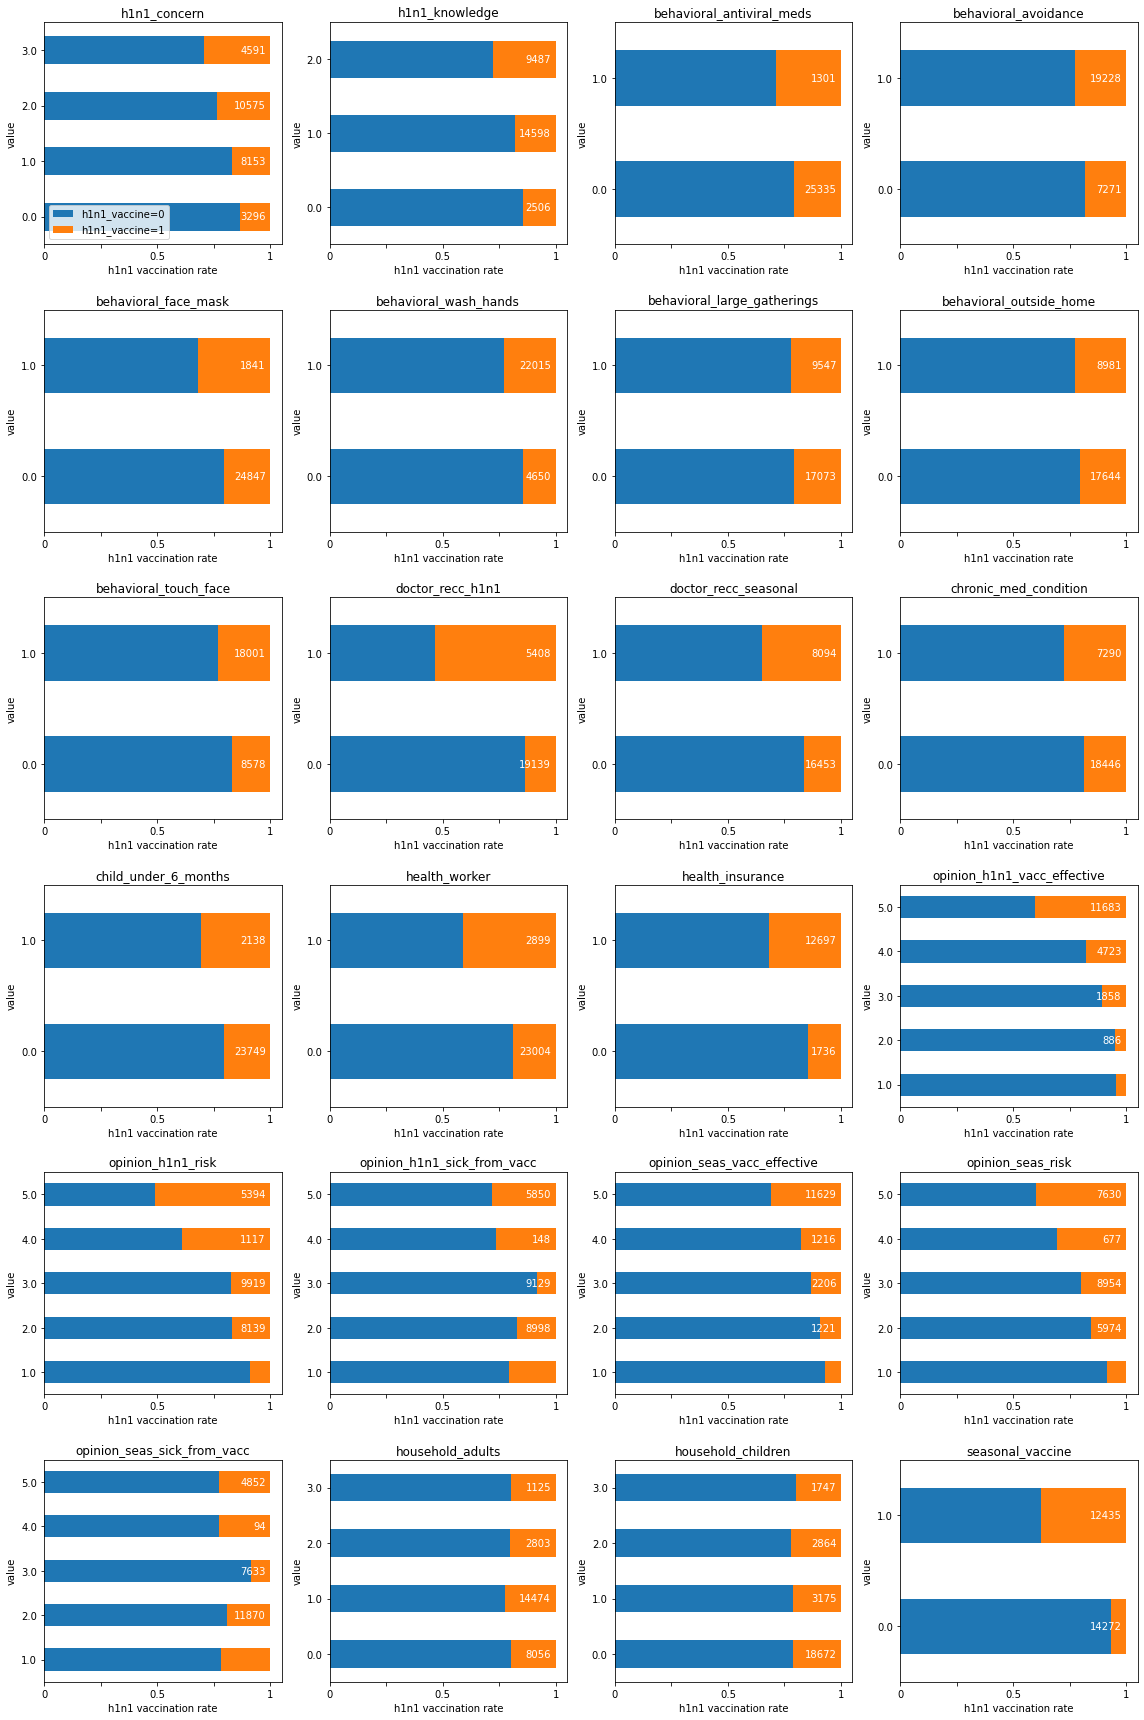

In [13]:
#For each numeric variable, generate the stacked plot showing vaccination rate by value

fig, axs = plt.subplots(int(np.ceil(len(cols_numeric)/4)), 4, figsize=(16, 4*np.ceil(len(cols_numeric)/4)))

for idx, col in enumerate(cols_numeric):
    if idx==0: #only plot legend for the first subplot
        plot_h1n1vac_rate(data_full, col, ax=axs.ravel()[idx], valuecount=True)
    else:
        plot_h1n1vac_rate(data_full, col, ax=axs.ravel()[idx], valuecount=True, legend=False)

fig.tight_layout()

In [14]:
## Code to calculate prediction accuracy from each numerical variable (in isolation)
#  This will be done after Imputing the data with the median (to replace NaNs)
#  and by rescaling the data to range from 0 to 1 (for ease of comparing coefficient weights)
#   [allows for fitting an intercept term, and comparision is to base model of a constant column]

#Import libraries for logistic regression

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

#Define a function to get the accuracy of a single feature in predicting h1n1_vaccination
def get_singlefeature_accuracy(df, col_name, target_name):
    
    dfsubset = df[[col_name, target_name]].copy()
    #dfsubset.dropna(axis=0, inplace=True)
    
    X=dfsubset[[col_name]]
    y=dfsubset[target_name]
    
    imputer = SimpleImputer(strategy='median') #apply median imputer to fill in missing data
    imputed_X = imputer.fit_transform(X)
    imputed_X = pd.DataFrame(imputed_X, columns=X.columns)
    
    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(imputed_X)
    scaled_X = pd.DataFrame(scaled_X, columns=X.columns)
    
    Xones = scaled_X.copy()
    Xones[:] = 1
    
    scaled_Xmat = pd.concat([scaled_X, Xones], axis=1)
    
    logreg = LogisticRegressionCV(fit_intercept=True, solver='liblinear', cv=3, class_weight=None, random_state=42)
    logreg.fit(scaled_Xmat, y)
    
    logregBASE = LogisticRegressionCV(fit_intercept=True, solver='liblinear', cv=3, class_weight=None, random_state=42)
    logregBASE.fit(Xones, y)
        
    #return variables, for scores -- take the mean accuracy across CV folds, then pick the max (corresponding to the optimal C regularization term)
    return logreg.coef_, np.max(np.mean(logreg.scores_[1], axis=0)), logregBASE.coef_, np.max(np.mean(logregBASE.scores_[1], axis=0))


#Define a function to take in variable names, and return them along with their coefficients (fitted in isolation),
# sorted in descending order by cross-validated accuracy
def get_featureregression_accuracy(df, col_names, target_name):
       
    scores = []    
    coefs = []
    scoresBASE = []
    coefsBASE = []
    for idx, col_name in enumerate(col_names):
        coef, score, coefBASE, scoreBASE = get_singlefeature_accuracy(df, col_name, target_name)
        coefs.append(coef[0][0])
        scores.append(score)
        coefsBASE.append(coefBASE[0][0])
        scoresBASE.append(scoreBASE)
    
    df_out = pd.DataFrame({'variable': col_names, 'coefficient': coefs, 'coefficientBase': coefsBASE, 'accuracy': scores, 'accuracyBASE': scoresBASE})
    df_out.sort_values(by=['accuracy'], ascending=False, inplace=True)
    return df_out

In [15]:
numeric_accuracy = get_featureregression_accuracy(data_full, list(cols_numeric), 'h1n1_vaccine')
numeric_accuracy

,variable,coefficient,coefficientBase,accuracy,accuracyBASE
9,doctor_recc_h1n1,0.779378,-0.335739,0.800652,0.787546
16,opinion_h1n1_risk,0.716088,-0.335739,0.788969,0.787546
0,h1n1_concern,0.083227,-0.335739,0.787546,0.787546
13,health_worker,0.113219,-0.335739,0.787546,0.787546
22,household_children,-0.001755,-0.335739,0.787546,0.787546
21,household_adults,0.005005,-0.335739,0.787546,0.787546
20,opinion_seas_sick_from_vacc,0.005751,-0.335739,0.787546,0.787546
19,opinion_seas_risk,0.174674,-0.335739,0.787546,0.787546
18,opinion_seas_vacc_effective,0.122949,-0.335739,0.787546,0.787546
17,opinion_h1n1_sick_from_vacc,0.050896,-0.335739,0.787546,0.787546


### A function that takes in all variables and returns regression accuracy

In [19]:


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegressionCV

# Define a function to take in a dataframe (df) and target variable (y), and transform the columns appropriately (impute, scale, onehotencode) and fit a regression model
def transform_and_regress(df, y):
    # inputs: 
    #         df -- dataframe
    #         y -- target variable
    #
    # returns: df_out, logmodel, coefs, score
    #
    # outputs:
    #         df_out -- a transformed dataframe of df, with columns imputed and scaled and categorical columns one hot encoded
    #         logmodel -- logistic regression model object returned after fitting
    #         coefs -- coefficients of the model fit
    #         score -- average accuracy score (across CV folds)
    
    numerical_col = list(df.columns[df.dtypes == "float64"].values) #Extract a list of columns with numerical data
    categorical_col = list(df.columns[df.dtypes == "object"].values) #Extract a list of the columns with categorical data
    
    imputer_median = SimpleImputer(strategy='median') #imputer for numeric data (median)
    imputer_missing = SimpleImputer(strategy='constant', fill_value='missing') #imputer for categorial data ('missing')
    ohe = OneHotEncoder(categories='auto', drop='first', sparse=False) #onehotencoder for categorical data
    scaler_num = StandardScaler() #standard scaler, numerical columns
    scaler_cat = StandardScaler() #standard scaler, categorical columns (after onehotencoding)
    
    #split dataframe into numerical and categorical
    if len(numerical_col)>0: #if we have any numerical columns
        df_num = df[numerical_col].copy()  
        df_num_transformed = scaler_num.fit_transform(imputer_median.fit_transform(df_num)) #impute and scale the numerical data
        df_num = pd.DataFrame(df_num_transformed, columns=df_num.columns) #convert back to dataframe with column labels
    
    if len(categorical_col)>0: #if we have any categorical columns
        df_cat = df[categorical_col].copy()
        df_cat_transformed = scaler_cat.fit_transform(ohe.fit_transform(imputer_missing.fit_transform(df_cat))) #impute missing, one hot encoding, and scale
        df_cat = pd.DataFrame(df_cat_transformed, columns=ohe.get_feature_names())#convert back to dataframe with new onehotencoded column labels
    
    if len(numerical_col)>0 and len(categorical_col)>0:
        df_out = pd.concat([df_num, df_cat], axis=1) #concatenate the numerical and categorical columns into a dataframe for regression
    elif len(numerical_col)==0 and len(categorical_col)>0: #if no numerical columns
        df_out = df_cat #output is just the categorical columns
    elif len(numerical_col)>0 and len(categorical_col)==0: #if no categorical columns
        df_out = df_num #output is just the numerical columns
        
    logreg = LogisticRegressionCV(fit_intercept=True, solver='liblinear', cv=10, class_weight=None, random_state=42)
    logreg.fit(df_out, y) #fit a cross validated logistic regression model
        
    #returns the transformed dataframe, the logistic model, the coefficients, and the average accuracy (averaged across CV folds, but chosen for peak C regularization term)
    return df_out, logreg, logreg.coef_, np.max(np.mean(logreg.scores_[1], axis=0))
  

# Define a function that iterates over each variable in a dataframe and tallies the accuracy of a regression model fit to that variable in isolation (along with an intercept)
# returns a list of variables, sorted in descending order by accuracy
def single_variable_regression_accuracy(df, y):
    # inputs: 
    #         df -- dataframe
    #         y -- target variable
    #
    # returns: df_summary
    #
    # outputs:
    #         df_summary -- a dataframe summarizing regression performance on individual variables, with columns ['varname', 'accuracy','coefs']
    
    varnames=[]
    accuracy=[]
    coefficients=[]
    
    for col in df.columns: #loop over individual columns
        
        df_out, logmodel, coef, score = transform_and_regress(df[[col]], y) #transform data and fit regression model
        varnames.append(col) #append outputs
        accuracy.append(score)
        coefficients.append(coef)
    
    df_summary = pd.DataFrame(data={'varname': varnames, 'accuracy': accuracy, 'coefs': coefficients}) #store outputs in dataframe
    df_summary.sort_values(by=['accuracy'], ascending=False, inplace=True) #sort variables by descending accuracy
    
    return df_summary

In [20]:
#df_summary = single_variable_regression_accuracy(data_full[['h1n1_concern','sex']], data_full['h1n1_vaccine'])
df_summary = single_variable_regression_accuracy(data_full[cols_numeric + cols_cat], data_full['h1n1_vaccine'])
df_summary

,varname,accuracy,coefs
9,doctor_recc_h1n1,0.800651,[[0.260912950083364]]
16,opinion_h1n1_risk,0.788969,[[0.5255075068263039]]
19,opinion_seas_risk,0.787546,[[0.1710559658265687]]
20,opinion_seas_sick_from_vacc,0.787546,[[0.00562651830421424]]
21,household_adults,0.787546,[[0.004896784448781143]]
22,household_children,0.787546,[[-0.0017168070611618686]]
23,seasonal_vaccine,0.787546,[[0.25240796970830276]]
24,age_group,0.787546,"[[-0.007241725202948863, -0.010731921715306401..."
25,education,0.787546,"[[-0.01951964266484908, 0.040413211402790375, ..."
17,opinion_h1n1_sick_from_vacc,0.787546,[[0.049815962098736566]]


### Apply logistic regression to all variables combined and evaluate performance

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define a pipeline for preprocessing column data (imputing, scaling, onehotencoding) and applying logistic regression, returning a model object
def logistic_pipeline(df, y):
    # inputs: 
    #         df -- dataframe
    #         y -- target variable
    #
    # returns: df_out, logmodel, coefs, score
    #
    # outputs:
    #         df_out -- a transformed dataframe of df, with columns imputed and scaled and categorical columns one hot encoded
    #         logmodel -- model object after the logistic regression fit
    #         coefs -- a list of the coefficient weights of the model
    #         score -- average accuracy score (averaged over cross validation folds)
    
    
    numerical_col = list(df.columns[df.dtypes == "float64"].values) #Extract a list of columns with numerical data
    categorical_col = list(df.columns[df.dtypes == "object"].values) #Extract a list of the columns with categorical data
    
    numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')), #impute the median value
        ('scaler', StandardScaler()) #scale the entries to have standard variance
    ])
    
    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), #impute 'missing' label
        ('encoder', OneHotEncoder(categories='auto', drop='first', sparse=False)), #onehotencode the variables
        ('scaler', StandardScaler()) #scale the entries to have standard variance
    ])
    
    preprocessing_pipeline = ColumnTransformer([
        ('numerical_preprocessor', numerical_pipeline, numerical_col),
        ('categorical_preprocessor', categorical_pipeline, categorical_col)
    ])
    
    full_pipeline = Pipeline([
        ('preprocessor', preprocessing_pipeline),
        ('estimator', LogisticRegressionCV(fit_intercept=True, solver='liblinear', cv=3, class_weight=None, random_state=42))
    ])
    
    full_pipeline.fit(df, y)
        
    df_out = preprocessing_pipeline.fit_transform(df)
    
    #return the: transformed_dataframe, pipeline, coefficients, score (averaged across CV folds and chosen for optimal C regularization term)
    return df_out, full_pipeline, full_pipeline.named_steps['estimator'].coef_, np.max(np.mean(full_pipeline.named_steps['estimator'].scores_[1], axis=0))
    

In [22]:
df_input = data_full.drop(labels=['h1n1_vaccine'], axis=1)
y = data_full['h1n1_vaccine']

df_out, full_pipeline, coefs, score = logistic_pipeline(df_input, y)
print('Logistic Regression accuracy (using all variables): ', score)


Logistic Regression accuracy (using all variables):  0.8525855257575722


We get a performance of 85% accuracy with feeding in the numerical + categorical variables into the regression model, and using default regularization penalty choices.

### Greedy Search

Now let's see if we can do any better with a greedy approach, where we iteratively add one variable at a time, at each step adding the variable that contributes the greatest boost to overall accuracy of the model.

In [23]:
#Define a function to identify the next best variable to add to the regression model
def find_next_best_variable(df, y, varlist):
    # inputs: 
    #         df -- dataframe
    #         y -- target variable
    #         varlist -- list of current variables in the model, input empty list if no current variables
    #
    # returns: df_summary, newvarlist, score, df_out, full_pipeline
    #
    # outputs:
    #         df_summary -- a DataFrame listing the summary performance of adding each considered variable to the model
    #         finalvarlist -- the original varlist with the best single variable appended onto it
    #         score -- accuracy of the model with that optimal variable added (averaged across CV folds and chosen for optimal C regularization term)
    #         df_out -- DataFrame that was fed to estimator (i.e. after imputing, scaling, onehotencoding)
    #         coefs -- coefficients of the optimal model
    #         full_pipeline -- pipeline object of the optimal model
    
    varcandidates = [col for col in df.columns if col not in varlist] #identify columns that are not in the current model
    tested_var = [] #initialize entries to store tested variables and model accuracy
    tested_accuracy = []
    
    for var in varcandidates: #loop over candidate variables
        #print(var)
        newvarlist = varlist.copy()
        newvarlist.append(var) #add current variable to the list
        
        df_input = df[newvarlist] #confine data to these considered variables
        df_out, full_pipeline, coefs, score = logistic_pipeline(df_input, y) #run through the pipeline
        tested_var.append(var) #store variable name tested
        tested_accuracy.append(score) #store accuracy score
        
    df_summary = pd.DataFrame(data={'varname': tested_var, 'accuracy':tested_accuracy})    
    df_summary.sort_values(by=['accuracy'], ascending=False, inplace=True)
    
    finalvarlist = varlist.copy()
    finalvarlist.append(df_summary.iloc[0,0])
    score_out = df_summary.iloc[0,1]
    
    #now just reapply the pipeline to this optimal model with the additional variable so we can output the pipeline object
    df_input = df[finalvarlist] #confine data to these final variables
    df_out, full_pipeline, coefs, score = logistic_pipeline(df_input, y) #run through the pipeline
    
    return df_summary, finalvarlist, score_out, df_out, coefs, full_pipeline

#Define a function to iterate over variables, successively adding the next optimal variable (based on CV accuracy), up to N variables
def select_N_best_variables(df, y, N):
    # inputs: 
    #         df -- dataframe
    #         y -- target variable
    #         N -- a scalar defining the final # of variables to include
    #
    # returns: df_summary, newvarlist, score, df_out, coefs, full_pipeline
    #
    # outputs:
    #         df_summary -- a DataFrame listing the cumulative performance of adding each  variable to the model
    #         output_varlist -- ordered list of the variables at they were added
    #         score -- accuracy of the final model with N variables (averaged across CV folds and chosen for optimal C regularization term)
    #         df_out -- DataFrame that was fed to estimator (i.e. after imputing, scaling, onehotencoding)
    #         coefs -- coefficients of the final model of N variables
    #         full_pipeline -- pipeline object of the final model
    output_varlist = []
    cumulative_accuracy = []
    
    for idx in range(N): #
        print('Identifying variable #', idx+1)
        df_summary, finalvarlist, score, df_out, coefs, full_pipeline = find_next_best_variable(df, y, output_varlist) #find next best variable given current state of the list
        cumulative_accuracy.append(score)
        output_varlist = finalvarlist
        print('best variable: ', finalvarlist[-1])
        print('cumulative accuracy: ', score), print('')
    
    
    df_summary = pd.DataFrame(data={'varname':output_varlist, 'cumulative accuracy':cumulative_accuracy})
    
    return df_summary, output_varlist, score, df_out, coefs, full_pipeline
    
    

In [24]:
df_summary, output_varlist, score, df_out, coefs, full_pipeline = select_N_best_variables(df_input[cols_numeric + cols_cat], data_full['h1n1_vaccine'], 20)

Identifying variable # 1
best variable:  doctor_recc_h1n1
cumulative accuracy:  0.8006515532799274

Identifying variable # 2
best variable:  seasonal_vaccine
cumulative accuracy:  0.8372337256550856

Identifying variable # 3
best variable:  opinion_h1n1_vacc_effective
cumulative accuracy:  0.8378702614923456

Identifying variable # 4
best variable:  health_worker
cumulative accuracy:  0.843149772035254

Identifying variable # 5
best variable:  opinion_h1n1_risk
cumulative accuracy:  0.844947024210838

Identifying variable # 6
best variable:  doctor_recc_seasonal
cumulative accuracy:  0.8493279570333411

Identifying variable # 7
best variable:  h1n1_concern
cumulative accuracy:  0.8500018703458113

Identifying variable # 8
best variable:  opinion_seas_vacc_effective
cumulative accuracy:  0.8512749966965075

Identifying variable # 9
best variable:  child_under_6_months
cumulative accuracy:  0.8516119827937607

Identifying variable # 10
best variable:  marital_status
cumulative accuracy: 

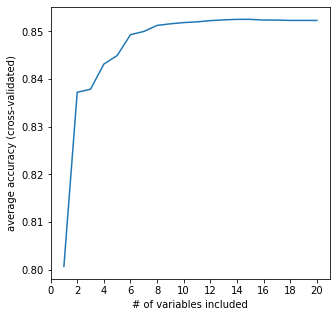

In [25]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(1+np.arange(df_summary.shape[0]),df_summary['cumulative accuracy'])
ax.set_xlabel('# of variables included')
ax.set_ylabel('average accuracy (cross-validated)')
ax.set_xticks(np.arange(0,22,2));

Based on the above plot, it appears that including the topmost 10-14 variables yields the peak performance accuracy.

In [26]:
# Define a function that explores pairwise products of the input variables, to add nonlinear products to the regression model

def evaluate_pairwise_products(df_input, y):
    # inputs: 
    #         df_input -- dataframe input of the relevant variables (where any categorical ones have already been onehotencoded through the pipeline)
    #         y -- target variable
    #         
    #
    # returns: df_summary, newvarlist, score, df_out, full_pipeline
    #
    # outputs:
    #         df_summary 
    
    n_variables = df_input.shape[1] #get number of input variables
    variable1=[] #initialize lists for element pairs of variables
    variable2=[]
    accuracy=[]
    
    for idx1 in range(n_variables-1): #store indices of variables 1 and 2 to compute pairwise product from
        for idx2 in range(idx1+1, n_variables):
            variable1.append(idx1)
            variable2.append(idx2)
    
    pairs=pd.DataFrame(data={'variable1':variable1, 'variable2':variable2})
    product_array = np.zeros((df_input.shape[0], pairs.shape[0]))
    
    for idx in range(pairs.shape[0]): #loop over product pairs
        idx1 = pairs.iloc[idx,0] #pull indices of element in the pair
        idx2 = pairs.iloc[idx,1]
        col1 = df_input.iloc[:, idx1] #pull values of that variable
        col2 = df_input.iloc[:, idx2]
        col_product = np.array(col1*col2) #compute product of variables 1 and 2
        product_array[:, idx] = col_product #store in product_array
        
        df_append = df_input.copy() #copy the input dataframe
        df_newproduct = pd.DataFrame(data={n_variables+1:col_product})
        df_append = pd.concat([df_append, df_newproduct], ignore_index=True, axis=1) #append pairwise product to input dataframe
        #df_append['new_product'] = col_product
        #df_append.iloc[:,n_variables+1] = col_product
        
        df_out, full_pipeline, coefs, score = logistic_pipeline(df_append, y) #pass dataframe with added pairwise_product variable through the pipeline
        print(f'Logistic Regression accuracy (using product of {idx1} and {idx2} variables): {score}')
        
        accuracy.append(score)
    
    pairs['accuracy'] = accuracy #store accuracy alongside pair indices
    pairs.sort_values(by=['accuracy'], ascending=False, inplace=True) #sort by descending accuracy
    sortidx = pairs.index #pull the index after sorting
    
    df_product = pd.DataFrame(product_array[:,sortidx]) #structure the product_array in the same order as pairs sorted by accuracy
    
    #returns the df_input (input dataframe), df_product (the dataframe of all pairwise products), and pairs (dataframe of product pairs and accuracy)
    # df_product and pairs are ordered in descending order from greatest accuracy to least (left to right columns for df_product, and top to bottom rows for pairs dataframe)
    return df_input, df_product, pairs

In [27]:
df_test = pd.DataFrame(data=df_out).iloc[:,:14]
#df_test = pd.DataFrame(data=df_out).iloc[:,:]
df_test

df_in, df_prod, pairs = evaluate_pairwise_products(df_test, y)

Logistic Regression accuracy (using product of 0 and 1 variables): 0.8509380190109738
Logistic Regression accuracy (using product of 0 and 2 variables): 0.8511626918306282
Logistic Regression accuracy (using product of 0 and 3 variables): 0.8504137922454529
Logistic Regression accuracy (using product of 0 and 4 variables): 0.8509754932209574
Logistic Regression accuracy (using product of 0 and 5 variables): 0.8508257183509541
Logistic Regression accuracy (using product of 0 and 6 variables): 0.8506759182457925
Logistic Regression accuracy (using product of 0 and 7 variables): 0.850675981333688
Logistic Regression accuracy (using product of 0 and 8 variables): 0.8507507993720046
Logistic Regression accuracy (using product of 0 and 9 variables): 0.8511627170657864
Logistic Regression accuracy (using product of 0 and 10 variables): 0.851387356238563
Logistic Regression accuracy (using product of 0 and 11 variables): 0.8506385155354238
Logistic Regression accuracy (using product of 0 and 1

In [28]:
df_prod

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,1.603451,0.592612,0.337417,1.334503,1.097452,0.232006,0.562276,1.436217,0.309037,0.571944,...,0.166723,0.947586,0.343579,0.308753,0.404060,0.581385,0.449636,0.325719,0.230110,0.175833
1,-0.027193,-0.124933,0.139556,-0.281336,-0.231362,-0.312092,-0.756367,-0.302780,-0.384083,-0.656436,...,0.166723,0.011946,-0.765098,0.308753,0.404060,1.741556,-1.001272,-0.373837,0.230110,0.175833
2,0.020215,0.592612,0.337417,-3.554463,1.097452,0.232006,0.562276,1.436217,0.309037,-1.523378,...,-0.444070,0.011946,0.343579,-0.822368,-1.076219,0.581385,0.449636,0.325719,0.230110,0.175833
3,-0.771403,-0.124933,-0.256167,0.749343,-0.231362,0.232006,-1.293012,0.696273,-0.153043,1.748424,...,-0.444070,-0.455873,0.343579,-0.822368,2.474879,0.581385,-1.033986,-0.373837,-0.529163,0.175833
4,0.811833,-0.124933,0.337417,-0.281336,-0.231362,0.232006,0.562276,-0.302780,-0.153043,0.571944,...,0.166723,0.479766,-0.210760,0.308753,0.404060,-0.356635,-0.275818,0.325719,0.230110,0.175833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,-0.771403,0.592612,0.139556,1.334503,1.097452,0.232006,0.562276,1.436217,0.309037,0.571944,...,0.166723,-0.455873,-0.210760,0.308753,0.404060,-0.356635,-0.275818,0.325719,0.230110,0.175833
26703,0.133139,-0.124933,0.337417,-0.281336,0.911202,-0.040043,0.223166,0.696273,0.077997,0.571944,...,0.166723,1.795422,-1.353161,-1.216001,-0.929179,-0.100344,-1.033986,-2.674963,4.345742,5.687201
26704,0.133139,1.687444,3.459996,-0.281336,-0.231362,0.540851,-0.097045,-0.302780,-0.384083,-0.656436,...,-2.251898,-0.455873,-0.210760,0.308753,0.404060,0.061553,-0.275818,-0.373837,0.230110,0.175833
26705,1.603451,0.592612,0.337417,1.334503,1.097452,0.232006,0.562276,1.436217,0.309037,0.571944,...,0.166723,0.947586,0.343579,0.308753,0.404060,0.581385,0.449636,0.325719,0.230110,0.175833


In [29]:
pairs.head(20)


,variable1,variable2,accuracy
29,2,7,0.851500
81,9,10,0.851500
84,9,13,0.851500
85,10,11,0.851387
9,0,10,0.851387
31,2,9,0.851387
27,2,5,0.851350
59,5,10,0.851312
49,4,8,0.851312
22,1,11,0.851312


In [72]:
num_products = 10
df_test = pd.concat([df_in, df_prod.iloc[:,:num_products]], ignore_index=True, axis=1)
print(df_test.shape)

df_testout, full_pipeline, coefs, score = logistic_pipeline(df_test, y) #pass dataframe with added pairwise_product variable through the pipeline
print(f'Logistic Regression accuracy (using top {num_products} pairwise products): {score}')

(26707, 24)
Logistic Regression accuracy (using top 10 pairwise products): 0.8518366051430984


In [40]:
full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18]),
                                                 ('categorical_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                  

In [44]:
from sklearn.model_selection import GridSearchCV

#clf = GridSearchCV(full_pipeline, {'estimator__Cs': [.1, 1, 10, 100]})
clf = GridSearchCV(full_pipeline, {'estimator__penalty': ['l1','l2','elasticnet']})
clf.fit(df_test, y)

C:\Users\chris\.conda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\chris\.conda\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chris\.conda\envs\learn-env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\chris\.conda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1787, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\chris\.conda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: 

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical_preprocessor',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         [0, 1,
                                                                          2, 3,
                                                                          4, 5,
                                                                          6, 7,
                                                                          8, 9,
        

In [73]:
#gridparam = {'penalty':['l1','l2','elasticnet'], 'max_iter':[1000], 'tol':[1e-6], 'solver':['liblinear', 'lbfgs','saga']}
#gd = GridSearchCV(LogisticRegressionCV(Cs=20,fit_intercept=True, solver='liblinear', cv=3, class_weight=None, random_state=42), gridparam)
#gridparam = {'Cs':[10,20,40], 'max_iter':[100, 200, 800], 'tol':[1e-6, 1e-4], 'solver':['liblinear', 'lbfgs']}
gridparam = {'Cs':[10,20,40], 'max_iter':[50, 100, 200], 'tol':[1e-6], 'class_weight':[None], 'solver':['liblinear','lbfgs']}
gd = GridSearchCV(LogisticRegressionCV(Cs=20,fit_intercept=True, solver='liblinear', cv=3, class_weight=None, random_state=42), gridparam)

#gd.fit(df_test, y)
gd.fit(df_in, y)
gd.best_params_


{'Cs': 10,
 'class_weight': None,
 'max_iter': 50,
 'solver': 'liblinear',
 'tol': 1e-06}

In [74]:
print(gd.best_estimator_)
print(gd.best_score_)
print(gd.best_params_)

LogisticRegressionCV(cv=3, max_iter=50, random_state=42, solver='liblinear',
                     tol=1e-06)
0.8512750449308489
{'Cs': 10, 'class_weight': None, 'max_iter': 50, 'solver': 'liblinear', 'tol': 1e-06}


### Get plot of Hyperparameter Space and also metric of F1 Score

### ROC curves?


### Apply Decision Tree analysis

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
import time

In [85]:
df_test.shape

(26707, 24)

In [89]:
X = df_test
y = data_full['h1n1_vaccine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [131]:
# Define a pipeline for preprocessing column data (imputing, scaling, onehotencoding if needed) and applying a decision tree, returning a model object
def decisiontree_pipeline(df, y):
    # inputs: 
    #         df -- dataframe
    #         y -- target variable
    #
    # returns: df_out, logmodel, coefs, score
    #
    # outputs:
    #         df_out -- a transformed dataframe of df, with columns imputed and scaled and categorical columns one hot encoded
    #         full_pipeline -- pipeline object after the decision tree fit
    
    
    
    numerical_col = list(df.columns[df.dtypes == "float64"].values) #Extract a list of columns with numerical data
    categorical_col = list(df.columns[df.dtypes == "object"].values) #Extract a list of the columns with categorical data
    
    numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')), #impute the median value
        ('scaler', StandardScaler()) #scale the entries to have standard variance
    ])
    
    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), #impute 'missing' label
        ('encoder', OneHotEncoder(categories='auto', drop='first', sparse=False)), #onehotencode the variables
        ('scaler', StandardScaler()) #scale the entries to have standard variance
    ])
    
    preprocessing_pipeline = ColumnTransformer([
        ('numerical_preprocessor', numerical_pipeline, numerical_col),
        ('categorical_preprocessor', categorical_pipeline, categorical_col)
    ])
    
    full_pipeline = Pipeline([
        ('preprocessor', preprocessing_pipeline),
        ('clf', DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=8, min_samples_split=0.05, min_samples_leaf=0.025))
    ])
    
    full_pipeline.fit(df, y)
        
    df_out = preprocessing_pipeline.fit_transform(df)
    
    #return the: transformed_dataframe, pipeline, coefficients, score (averaged across CV folds and chosen for optimal C regularization term)
    return df_out, full_pipeline#, full_pipeline.named_steps['estimator'].coef_, np.max(np.mean(full_pipeline.named_steps['estimator'].scores_[1], axis=0))
    

In [132]:
X_dfout, decision_pipeline = decisiontree_pipeline(X_train, y_train)

In [133]:
#dir(decision_pipeline)
acc = accuracy_score(y_test,decision_pipeline.predict(X_test))
print('Accuracy is :{0}'.format(100*acc))

Accuracy is :84.81353901452748


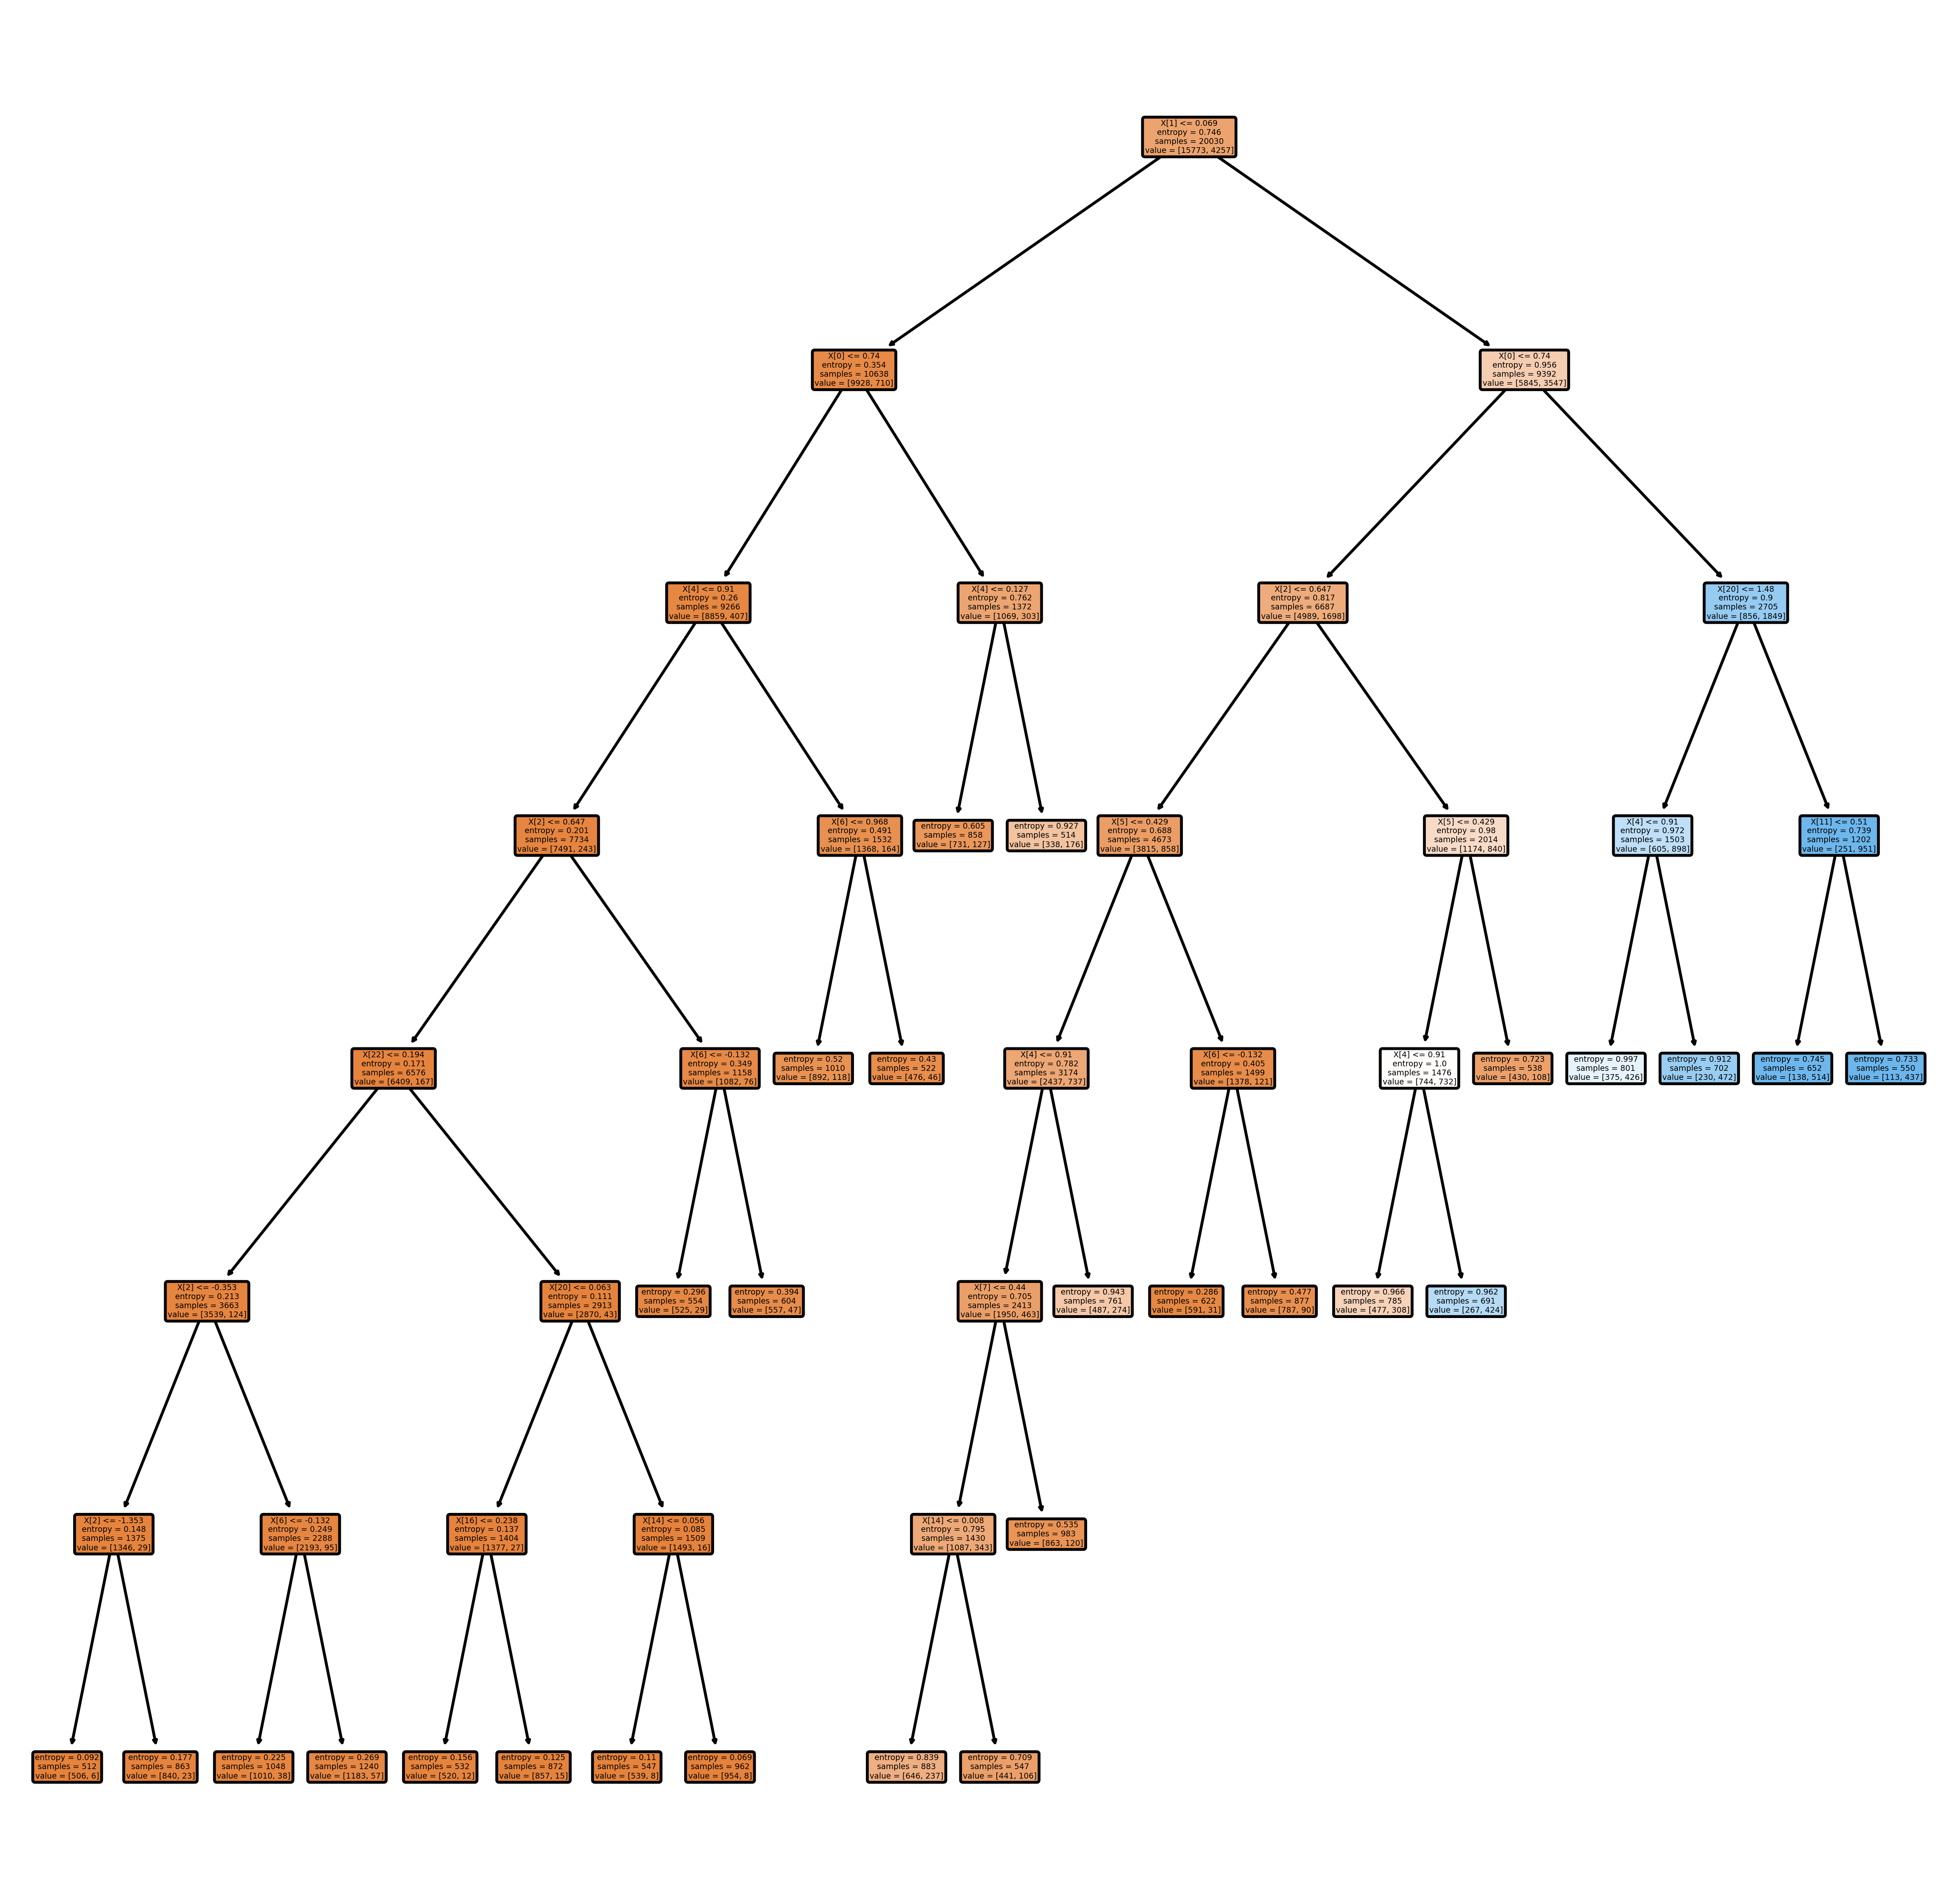

Total runtime is 3.332775592803955.
Accuracy is :84.81353901452748
roc_auc is : 0.7350102369113776


In [130]:
begin=time.time()

#clf2 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf2 = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=8, min_samples_split=0.05, min_samples_leaf=0.025)
clf2.fit(X_train, y_train)

plt.figure(figsize=(12,12), dpi=500)
tree.plot_tree(clf2, filled=True, rounded=True)
plt.show()

end=time.time()
print(f'Total runtime is {end - begin}.')

y_pred = clf2.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy is :{0}'.format(100*acc))

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(f'roc_auc is : {roc_auc}')

### Hyperparameter tuning of the Decision Tree

#### max_depth parameter

Best Param:  {'clf__max_depth': 5}


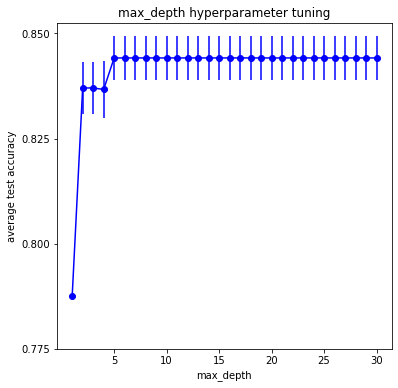

In [178]:
# Tune the 'max_depth' parameter of the tree
clf_parameters = {'clf__max_depth':list(np.arange(1,31,1))}
#clf_parameters = {'clf__max_depth':range(1,21,1), 'random_state':[42], 'min_samples_split':[0.05], 'min_samples_leaf':[0.025], 'criterion':['entropy']}
grid = GridSearchCV(decision_pipeline, clf_parameters, cv=5).fit(X_train, y_train)
results_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')

fig,ax = plt.subplots(figsize=(6,6))
ax.errorbar(results_df['param_clf__max_depth'], results_df['mean_test_score'], results_df['std_test_score'], fmt='bo-')
ax.set_xticks(np.arange(5,35,5))
ax.set_xlabel('max_depth')
ax.set_yticks(np.arange(.775,.875, .025))
ax.set_ylabel('average test accuracy')
ax.set_title('max_depth hyperparameter tuning')

print('Best Param: ', grid.best_params_)

#### min_samples_split parameter

Best Param:  {'clf__max_depth': 10, 'clf__min_samples_split': 0.01}


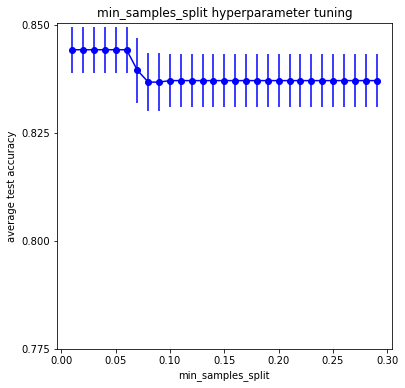

In [180]:
# Tune the 'min_samples_split' parameter of the tree
clf_parameters = {'clf__min_samples_split':list(np.arange(0.01,0.3,0.01)), 'clf__max_depth':[10]}
#clf_parameters = {'clf__max_depth':range(1,21,1), 'random_state':[42], 'min_samples_split':[0.05], 'min_samples_leaf':[0.025], 'criterion':['entropy']}
grid = GridSearchCV(decision_pipeline, clf_parameters, cv=5).fit(X_train, y_train)
results_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')

fig,ax = plt.subplots(figsize=(6,6))
ax.errorbar(results_df['param_clf__min_samples_split'], results_df['mean_test_score'], results_df['std_test_score'], fmt='bo-')
ax.set_xticks(np.arange(0,0.31,0.05))
ax.set_xlabel('min_samples_split')
ax.set_yticks(np.arange(.775,.875, .025))
ax.set_ylabel('average test accuracy')
ax.set_title('min_samples_split hyperparameter tuning')

print('Best Param: ', grid.best_params_)

#### min_samples_leaf parameter

Best Param:  {'clf__max_depth': 10, 'clf__min_samples_leaf': 0.01, 'clf__min_samples_split': 0.02}


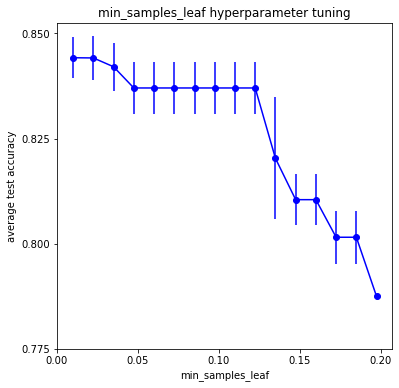

In [181]:
# Tune the 'min_samples_leaf' parameter of the tree
clf_parameters = {'clf__min_samples_leaf':list(np.arange(0.01,0.21,0.0125)), 'clf__max_depth':[10], 'clf__min_samples_split':[0.02]}
#clf_parameters = {'clf__max_depth':range(1,21,1), 'random_state':[42], 'min_samples_split':[0.05], 'min_samples_leaf':[0.025], 'criterion':['entropy']}
grid = GridSearchCV(decision_pipeline, clf_parameters, cv=5).fit(X_train, y_train)
results_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')

fig,ax = plt.subplots(figsize=(6,6))
ax.errorbar(results_df['param_clf__min_samples_leaf'], results_df['mean_test_score'], results_df['std_test_score'], fmt='bo-')
ax.set_xticks(np.arange(0,0.21,0.05))
ax.set_xlabel('min_samples_leaf')
ax.set_yticks(np.arange(.775,.875, .025))
ax.set_ylabel('average test accuracy')
ax.set_title('min_samples_leaf hyperparameter tuning')

print('Best Param: ', grid.best_params_)

#### max_features parameter

Best Param:  {'clf__max_depth': 10, 'clf__max_features': 21, 'clf__min_samples_leaf': 0.02, 'clf__min_samples_split': 0.02}


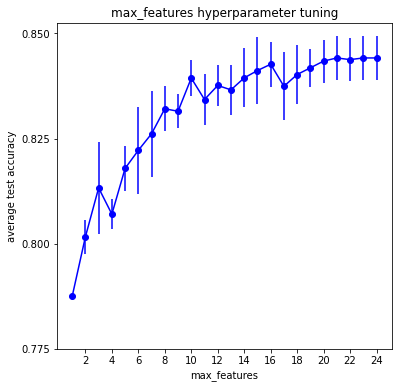

In [183]:
# Tune the 'max_features' parameter of the tree
clf_parameters = {'clf__max_features':list(np.arange(1,25)), 'clf__max_depth':[10], 'clf__min_samples_split':[0.02], 'clf__min_samples_leaf':[0.02]}
#clf_parameters = {'clf__max_depth':range(1,21,1), 'random_state':[42], 'min_samples_split':[0.05], 'min_samples_leaf':[0.025], 'criterion':['entropy']}
grid = GridSearchCV(decision_pipeline, clf_parameters, cv=5).fit(X_train, y_train)
results_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')

fig,ax = plt.subplots(figsize=(6,6))
ax.errorbar(results_df['param_clf__max_features'], results_df['mean_test_score'], results_df['std_test_score'], fmt='bo-')
ax.set_xticks(np.arange(2,25,2))
ax.set_xlabel('max_features')
ax.set_yticks(np.arange(.775,.875, .025))
ax.set_ylabel('average test accuracy')
ax.set_title('max_features hyperparameter tuning')

print('Best Param: ', grid.best_params_)

In [184]:
# Grid search across parameter ranges with similar performance to find optimal parameters in that corner of parameter space
clf_parameters = {'clf__max_features':list(np.arange(20,25)), 'clf__max_depth':[5,10,15,20], 'clf__min_samples_split':list(np.arange(0.01,0.06,0.01)), 'clf__min_samples_leaf':list(np.arange(0.01,0.05,0.01))}
#clf_parameters = {'clf__max_depth':range(1,21,1), 'random_state':[42], 'min_samples_split':[0.05], 'min_samples_leaf':[0.025], 'criterion':['entropy']}
grid = GridSearchCV(decision_pipeline, clf_parameters, cv=5).fit(X_train, y_train)
results_df = pd.DataFrame.from_dict(grid.cv_results_, orient='columns')

print('Best Param: ', grid.best_params_)

Best Param:  {'clf__max_depth': 5, 'clf__max_features': 21, 'clf__min_samples_leaf': 0.02, 'clf__min_samples_split': 0.05}


In [209]:
dt = decision_pipeline

In [210]:
dt.set_params(**grid.best_params_)
dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22,
                                                   23]),
                                                 ('categorical_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missi

In [212]:
dt.score(X_train,y_train)
dt.score(X_test, y_test)

0.8481353901452748

In [215]:
dt['clf']

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=21,
                       min_samples_leaf=0.02, min_samples_split=0.05,
                       random_state=42)

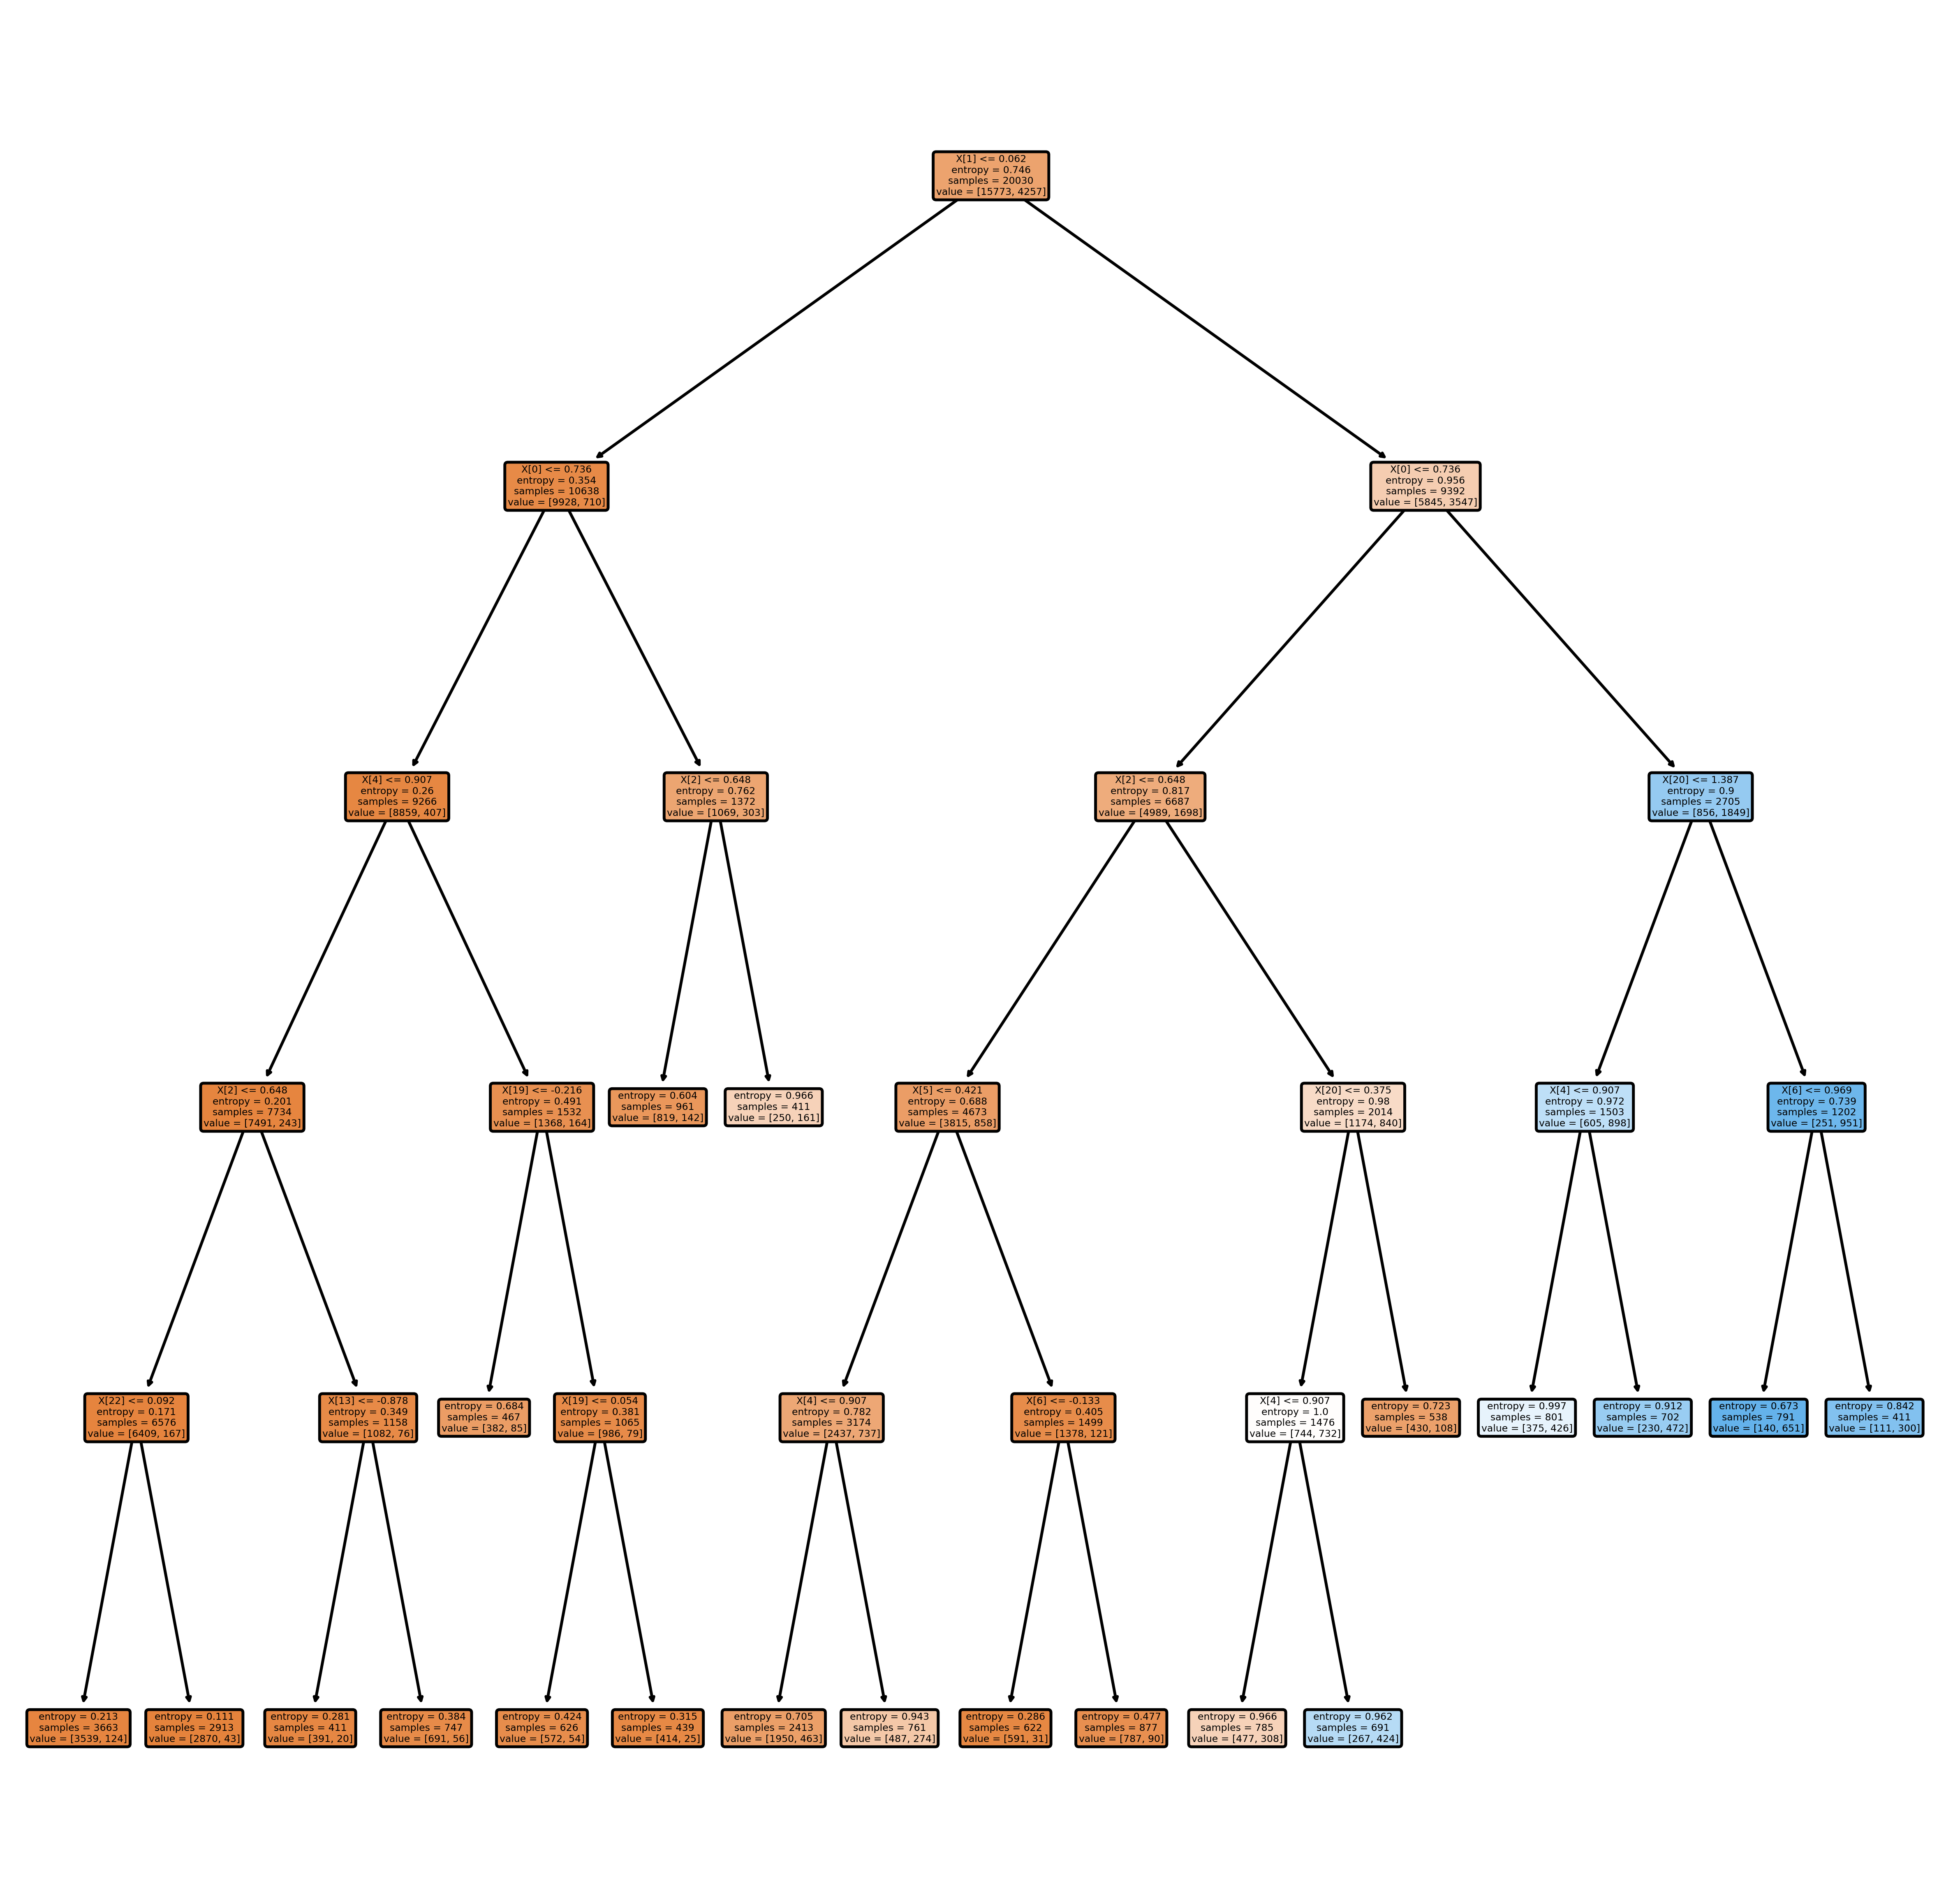

Training accuracy: 0.844882675986021
Test accuracy: 0.8481353901452748
roc_auc: 0.7350102369113776


In [216]:
plt.figure(figsize=(12,12), dpi=500)
tree.plot_tree(dt['clf'], filled=True, rounded=True)
plt.show()

print(f'Training accuracy: {dt.score(X_train,y_train)}')
print(f'Test accuracy: {dt.score(X_test,y_test)}')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, dt.predict(X_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
print(f'roc_auc: {roc_auc}')

In [199]:
pp = grid.best_params_
pp

{'clf__max_depth': 5,
 'clf__max_features': 21,
 'clf__min_samples_leaf': 0.02,
 'clf__min_samples_split': 0.05}

In [201]:
dt.steps[1].set_params(pp)

AttributeError: 'tuple' object has no attribute 'set_params'

In [203]:
dt.set_params(**pp)
dt

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22,
                                                   23]),
                                                 ('categorical_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missi

AttributeError: 'GridSearchCV' object has no attribute 'tree_'

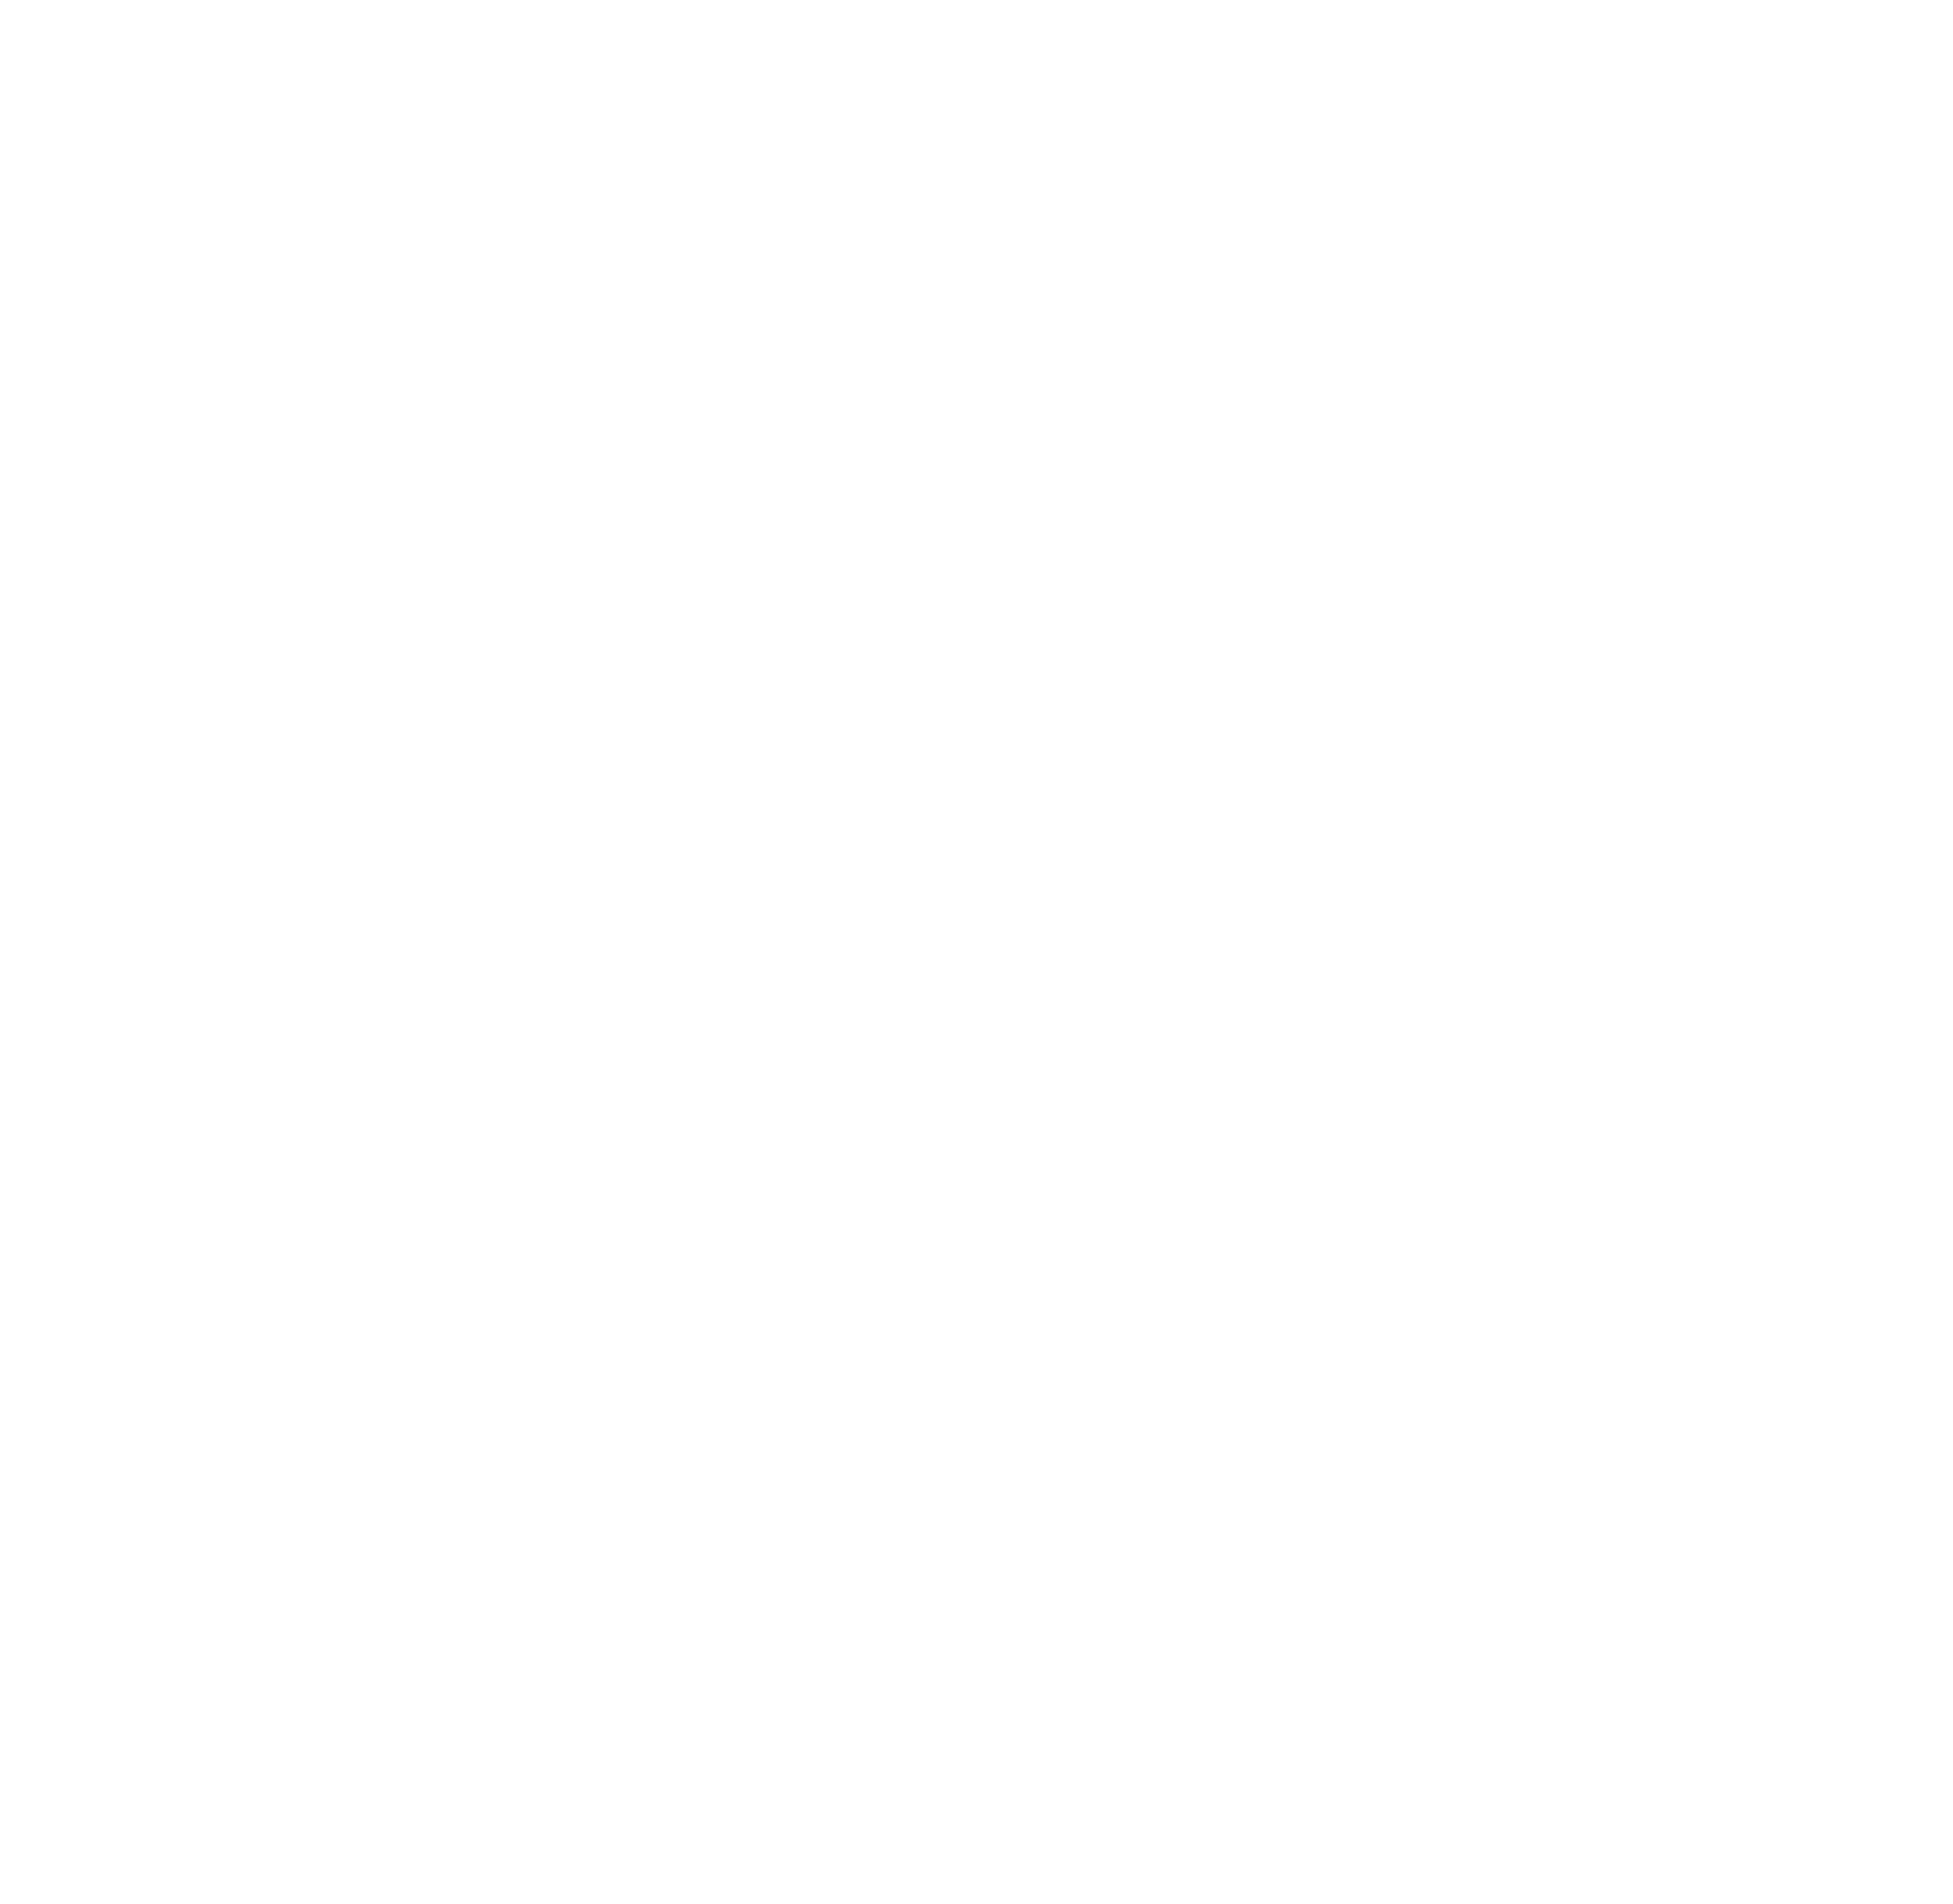

In [190]:
clf = decision_pipeline

plt.figure(figsize=(12,12), dpi=500)
tree.plot_tree(clf2, filled=True, rounded=True)
plt.show()

print(f'Training accuracy: {grid.score(X_train,y_train)}')
print(f'Test accuracy: {grid.score(X_test,y_test)}')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, grid.predict(X_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
print(f'roc_auc: {roc_auc}')

In [142]:
dir(grid)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_

In [119]:
# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7350102369113776

### SCRATCH CODE BELOW


In [ ]:
#initial regression try

## Code to calculate prediction accuracy from each numerical variable (in isolation)
#  This will be done after Imputing the data with the median (to replace NaNs)
#  and by rescaling the data to range from 0 to 1 (for ease of comparing coefficient weights)

#Import libraries for logistic regression

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

#Define a function to get the accuracy of a single feature in predicting h1n1_vaccination
def get_singlefeature_accuracy(df, col_name, target_name):
    
    dfsubset = df[[col_name, target_name]].copy()
    #dfsubset.dropna(axis=0, inplace=True)
    
    X=dfsubset[[col_name]]
    y=dfsubset[target_name]
    
    imputer = SimpleImputer(strategy='median') #apply median imputer to fill in missing data
    imputed_X = imputer.fit_transform(X)
    imputed_X = pd.DataFrame(imputed_X, columns=X.columns)
    
    scaler = MinMaxScaler() #rescale to set range from 0 to 1
    scaled_X = scaler.fit_transform(imputed_X)
    scaled_X = pd.DataFrame(scaled_X, columns=X.columns)
    
    #logreg = LogisticRegressionCV(fit_intercept=False, Cs=1e12, solver='liblinear', cv=5, class_weight='balanced', random_state=42)
    logreg = LogisticRegressionCV(fit_intercept=False, solver='liblinear', cv=10, class_weight='balanced', random_state=42)
    logreg.fit(scaled_X, y)
        
    return logreg.coef_, logreg.score(scaled_X,y).mean()


#Define a function to take in variable names, and return them along with their coefficients (fitted in isolation),
# sorted in descending order by cross-validated accuracy
def get_featureregression_accuracy(df, col_names, target_name):
       
    scores = []    
    coefs = []
    for idx, col_name in enumerate(col_names):
        coef, score = get_singlefeature_accuracy(df, col_name, target_name)
        coefs.append(coef[0][0])
        scores.append(score)
    
    df_out = pd.DataFrame({'variable': col_names, 'coefficient': coefs, 'accuracy': scores})
    df_out.sort_values(by=['accuracy'], ascending=False, inplace=True)
    return df_out

In [ ]:
numeric_accuracy = get_featureregression_accuracy(data_full, list(cols_numeric), 'h1n1_vaccine')
numeric_accuracy

------------


In [ ]:
#Import libraries for logistic regression

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

#Define a function to get the accuracy of a single feature in predicting h1n1_vaccination
def get_singlefeature_accuracy(df, col_name, target_name):
    
    dfsubset = df[[col_name, target_name]].copy()
    dfsubset.dropna(axis=0, inplace=True)
    X=dfsubset[[col_name]]
    y=dfsubset[target_name]
    #logreg = LogisticRegressionCV(fit_intercept=False, Cs=1e12, solver='liblinear', cv=5, class_weight='balanced', random_state=42)
    logreg = LogisticRegressionCV(fit_intercept=False, solver='liblinear', cv=10, class_weight='balanced', random_state=42)
    logreg.fit(X, y)
    
    #print(logreg.coef_[0][0])
    #print(logreg.intercept_)
    #print(logreg.scores_)
    #print(cross_val_score(logreg, X, y, cv=10))
    
    return logreg.coef_, logreg.score(X,y).mean()


#Define a function to take in variable names, and return them along with their coefficients (fitted in isolation),
# sorted in descending order by cross-validated accuracy
def get_featureregression_accuracy(df, col_names, target_name):
    
    scores = []    
    coefs = []
    for idx, col_name in enumerate(col_names):
        coef, score = get_singlefeature_accuracy(df, col_name, target_name)
        coefs.append(coef[0][0])
        scores.append(score)
    
    df_out = pd.DataFrame({'variable': col_names, 'coefficient': coefs, 'accuracy': scores})
    df_out.sort_values(by=['accuracy'], ascending=False, inplace=True)
    return df_out

In [ ]:
#TRYING TO TEST A COLUMN TO SEE IF I CAN IMPUTE THE MEDIAN AND THEN MINMAXSCALE

X = data_full[['h1n1_concern']]
#X.value_counts(dropna=True)
X.shape

#print(data[col].value_counts(dropna=False))
print(''),print(''),print('original X'), print(' ')
print(X['h1n1_concern'].value_counts(dropna=False))

imputer = SimpleImputer(strategy='median')
imputed_X = imputer.fit_transform(X)
imputed_X = pd.DataFrame(imputed_X, columns=X.columns)
print(''),print(''),print('imputed X'), print(' ')
print(imputed_X['h1n1_concern'].value_counts(dropna=False))

scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(imputed_X)
scaled_X = pd.DataFrame(scaled_X, columns=imputed_X.columns)
print(''),print(''),print('scaled X'), print(' ')
print(scaled_X['h1n1_concern'].value_counts(dropna=False))

In [ ]:
numeric_accuracy = get_featureregression_accuracy(data_full, list(cols_numeric), 'h1n1_vaccine')
numeric_accuracy

### Trying to compare single variable fit to constant (all 1s vector) coefficient and accuracy
Unclear whether to use balanced or not

In [ ]:
##drop the BALANCED, and add a COLUMN for predicting from regression on a ones vector

## Code to calculate prediction accuracy from each numerical variable (in isolation)
#  This will be done after Imputing the data with the median (to replace NaNs)
#  and by rescaling the data to range from 0 to 1 (for ease of comparing coefficient weights)

#Import libraries for logistic regression

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

#Define a function to get the accuracy of a single feature in predicting h1n1_vaccination
def get_singlefeature_accuracy(df, col_name, target_name):
    
    dfsubset = df[[col_name, target_name]].copy()
    #dfsubset.dropna(axis=0, inplace=True)
    
    X=dfsubset[[col_name]]
    y=dfsubset[target_name]
    
    imputer = SimpleImputer(strategy='median') #apply median imputer to fill in missing data
    imputed_X = imputer.fit_transform(X)
    imputed_X = pd.DataFrame(imputed_X, columns=X.columns)
    
    scaler = MinMaxScaler() #rescale to set range from 0 to 1
    scaled_X = scaler.fit_transform(imputed_X)
    scaled_X = pd.DataFrame(scaled_X, columns=X.columns)
    
    #logreg = LogisticRegressionCV(fit_intercept=False, Cs=1e12, solver='liblinear', cv=5, class_weight='balanced', random_state=42)
    #logreg = LogisticRegressionCV(fit_intercept=False, solver='liblinear', cv=10, random_state=42)
    #logreg = LogisticRegressionCV(fit_intercept=False, solver='liblinear', cv=10, class_weight='balanced', random_state=42)
    logreg = LogisticRegressionCV(fit_intercept=True, solver='liblinear', cv=10, class_weight='balanced', random_state=42)
    logreg.fit(scaled_X, y)
    
    Xones = scaled_X.copy()
    Xones[:] = 1
    
    #logregBASE = LogisticRegressionCV(fit_intercept=False, solver='liblinear', cv=10, random_state=42)
    #logregBASE = LogisticRegressionCV(fit_intercept=False, solver='liblinear', cv=10, class_weight='balanced', random_state=42)
    logregBASE = LogisticRegressionCV(fit_intercept=True, solver='liblinear', cv=10, class_weight='balanced', random_state=42)
    logregBASE.fit(Xones, y)
        
    return logreg.coef_, logreg.score(scaled_X,y).mean(), logregBASE.coef_, logregBASE.score(Xones,y).mean()


#Define a function to take in variable names, and return them along with their coefficients (fitted in isolation),
# sorted in descending order by cross-validated accuracy
def get_featureregression_accuracy(df, col_names, target_name):
       
    scores = []    
    coefs = []
    scoresBASE = []
    coefsBASE = []
    for idx, col_name in enumerate(col_names):
        coef, score, coefBASE, scoreBASE = get_singlefeature_accuracy(df, col_name, target_name)
        coefs.append(coef[0][0])
        scores.append(score)
        coefsBASE.append(coefBASE[0][0])
        scoresBASE.append(scoreBASE)
    
    df_out = pd.DataFrame({'variable': col_names, 'coefficient': coefs, 'coefficientBase': coefsBASE, 'accuracy': scores, 'accuracyBASE': scoresBASE})
    df_out.sort_values(by=['accuracy'], ascending=False, inplace=True)
    return df_out

In [ ]:
numeric_accuracy = get_featureregression_accuracy(data_full, list(cols_numeric), 'h1n1_vaccine')
numeric_accuracy

### Trying to compare single variable fit to constant (all 1s vector) coefficient and accuracy


### But with comparison being variable+constant, versus ONLY constant (above is just variable in isolation)

In [ ]:
##drop the BALANCED, and add a COLUMN for predicting from regression on a ones vector

## Code to calculate prediction accuracy from each numerical variable (in isolation)
#  This will be done after Imputing the data with the median (to replace NaNs)
#  and by rescaling the data to range from 0 to 1 (for ease of comparing coefficient weights)

#Import libraries for logistic regression

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer

#Define a function to get the accuracy of a single feature in predicting h1n1_vaccination
def get_singlefeature_accuracy(df, col_name, target_name):
    
    dfsubset = df[[col_name, target_name]].copy()
    #dfsubset.dropna(axis=0, inplace=True)
    
    X=dfsubset[[col_name]]
    y=dfsubset[target_name]
    
    imputer = SimpleImputer(strategy='median') #apply median imputer to fill in missing data
    imputed_X = imputer.fit_transform(X)
    imputed_X = pd.DataFrame(imputed_X, columns=X.columns)
    
    #scaler = MinMaxScaler() #rescale to set range from 0 to 1
    scaler = StandardScaler()
    scaled_X = scaler.fit_transform(imputed_X)
    scaled_X = pd.DataFrame(scaled_X, columns=X.columns)
    
    Xones = scaled_X.copy()
    Xones[:] = 1
    
    scaled_Xmat = pd.concat([scaled_X, Xones], axis=1)
    
    #logreg = LogisticRegressionCV(fit_intercept=False, Cs=1e12, solver='liblinear', cv=5, class_weight='balanced', random_state=42)
    #logreg = LogisticRegressionCV(fit_intercept=False, solver='liblinear', cv=10, random_state=42)
    #logreg = LogisticRegressionCV(fit_intercept=False, solver='liblinear', cv=10, class_weight='balanced', random_state=42)
    #logreg = LogisticRegressionCV(fit_intercept=False, solver='liblinear', cv=10, class_weight='balanced', random_state=42)
    logreg = LogisticRegressionCV(fit_intercept=True, solver='liblinear', cv=10, class_weight=None, random_state=42)
    logreg.fit(scaled_Xmat, y)
    
    print(logreg.coef_)
    
    #logregBASE = LogisticRegressionCV(fit_intercept=False, solver='liblinear', cv=10, random_state=42)
    #logregBASE = LogisticRegressionCV(fit_intercept=False, solver='liblinear', cv=10, class_weight='balanced', random_state=42)
    #logregBASE = LogisticRegressionCV(fit_intercept=False, solver='liblinear', cv=10, class_weight='balanced', random_state=42)
    logregBASE = LogisticRegressionCV(fit_intercept=True, solver='liblinear', cv=10, class_weight=None, random_state=42)
    logregBASE.fit(Xones, y)
        
    return logreg.coef_, logreg.score(scaled_Xmat,y).mean(), logregBASE.coef_, logregBASE.score(Xones,y).mean()


#Define a function to take in variable names, and return them along with their coefficients (fitted in isolation),
# sorted in descending order by cross-validated accuracy
def get_featureregression_accuracy(df, col_names, target_name):
       
    scores = []    
    coefs = []
    scoresBASE = []
    coefsBASE = []
    for idx, col_name in enumerate(col_names):
        coef, score, coefBASE, scoreBASE = get_singlefeature_accuracy(df, col_name, target_name)
        coefs.append(coef[0][0])
        scores.append(score)
        coefsBASE.append(coefBASE[0][0])
        scoresBASE.append(scoreBASE)
    
    df_out = pd.DataFrame({'variable': col_names, 'coefficient': coefs, 'coefficientBase': coefsBASE, 'accuracy': scores, 'accuracyBASE': scoresBASE})
    df_out.sort_values(by=['accuracy'], ascending=False, inplace=True)
    return df_out

In [ ]:
numeric_accuracy = get_featureregression_accuracy(data_full, list(cols_numeric), 'h1n1_vaccine')
numeric_accuracy

In [ ]:
## script to test if accuracy score matches the predict output compared to the label data
varname = 'doctor_recc_h1n1'
targetname = 'h1n1_vaccine'
X = data_full[[varname]]
y = data_full[[targetname]]

imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
X_imputed = imputer.fit_transform(X)
X_scaled = scaler.fit_transform(X_imputed)
X_null = X_scaled.copy()
X_null[:] = 0
print(X_null.shape)

print(''),print(''),print('SINGLE VARIABLE REGRESSION EXAMPLE')
logreg = LogisticRegressionCV(fit_intercept=True, solver='liblinear', cv=10, class_weight=None, random_state=42)
logreg.fit(X_scaled, y)
y_pred = logreg.predict(X_scaled)
print('intercept: ', logreg.intercept_)
print('coef: ', logreg.coef_)
print('y mean: ', y.mean())
print('y_pred mean: ', y_pred.mean())
print('score from logreg: ', logreg.score(X_scaled, y))

ncorrect = (y['h1n1_vaccine'] == y_pred)
ncorrect
print('fraction correct: ', ncorrect.mean())

print(''),print(''),print('NULL 0 VARIABLE REGRESSION EXAMPLE (i.e. constant)')
logreg_null = LogisticRegressionCV(fit_intercept=True, solver='liblinear', cv=10, class_weight=None, random_state=42)
logreg_null.fit(X_null, y)
y_null_pred = logreg_null.predict(X_null)
print('intercept: ', logreg_null.intercept_)
print('coef: ', logreg_null.coef_)
print('y mean: ', y.mean())
print('y_pred mean: ', y_null_pred.mean())
print('score from logreg: ', logreg_null.score(X_null, y))

ncorrect = (y['h1n1_vaccine'] == y_null_pred)
ncorrect
print('fraction correct: ', ncorrect.mean())

In [ ]:
## take in multiple variables, and perform regression on them

#varlist = ['doctor_recc_h1n1','opinion_h1n1_risk','h1n1_concern','h1n1_knowledge']
varlist = cols_numeric
targetname = 'h1n1_vaccine'
X = data_full[varlist]
y = data_full[[targetname]]

imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
X_imputed = imputer.fit_transform(X)
X_scaled = scaler.fit_transform(X_imputed)
#X_null = X_scaled[varlist[0]].copy()
#X_null[:] = 0
print(X_null.shape)

print(''),print(''),print('MULTIPLE VARIABLE REGRESSION EXAMPLE')
logreg = LogisticRegressionCV(fit_intercept=True, solver='liblinear', cv=10, class_weight=None, random_state=42)
logreg.fit(X_scaled, y)
y_pred = logreg.predict(X_scaled)
print('intercept: ', logreg.intercept_)
print('coef: ', logreg.coef_)
print('y mean: ', y.mean())
print('y_pred mean: ', y_pred.mean())
print('score from logreg: ', logreg.score(X_scaled, y))
ncorrect = (y['h1n1_vaccine'] == y_pred)
ncorrect
print('fraction correct: ', ncorrect.mean())

print(''),print(''),print('NULL 0 VARIABLE REGRESSION EXAMPLE (i.e. constant)')
logreg_null = LogisticRegressionCV(fit_intercept=True, solver='liblinear', cv=10, class_weight=None, random_state=42)
logreg_null.fit(X_null, y)
y_null_pred = logreg_null.predict(X_null)
print('intercept: ', logreg_null.intercept_)
print('coef: ', logreg_null.coef_)
print('y mean: ', y.mean())
print('y_pred mean: ', y_null_pred.mean())
print('score from logreg: ', logreg_null.score(X_null, y))

ncorrect = (y['h1n1_vaccine'] == y_null_pred)
ncorrect
print('fraction correct: ', ncorrect.mean())

In [ ]:
varlist[0]

In [ ]:
X_scaled[:,0]

In [ ]:
cols_numeric

In [ ]:
cols_cat

In [ ]:
X_cat = data.copy()
X_cat = X_cat[cols_cat]
X_cat

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

#transformed_cols = ['age_group']
transformed_cols = ['marital_status']
#transformed_cols = cols_cat

transformer = make_column_transformer((OneHotEncoder(categories='auto', drop='first', sparse=False),transformed_cols), remainder='passthrough')
#ohe = OneHotEncoder(categories='auto', drop='first', sparse_output=False)

new_data = data[transformed_cols].copy()
new_data
transformed = transformer.fit_transform(new_data)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())

transformed_df.head()

### Write a function to define a processing pipeline, but one that PRESERVES the column names for interpretability (i.e. akin to a pipeline, but returns the labelled dataframe, the coefficients, the accuracy)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegressionCV

# Define a function to take in a dataframe (df) and target variable (y), and transform the columns appropriately (impute, scale, onehotencode) and fit a regression model
def transform_and_regress(df, y):
    # inputs: 
    #         df -- dataframe
    #         y -- target variable
    #
    # returns: df_out, logmodel, coefs, score
    #
    # outputs:
    #         df_out -- a transformed dataframe of df, with columns imputed and scaled and categorical columns one hot encoded
    #         logmodel -- logistic regression model object returned after fitting
    #         coefs -- coefficients of the model fit
    #         score -- average accuracy score (across CV folds)
    
    numerical_col = list(df.columns[df.dtypes == "float64"].values) #Extract a list of columns with numerical data
    categorical_col = list(df.columns[df.dtypes == "object"].values) #Extract a list of the columns with categorical data
    
    imputer_median = SimpleImputer(strategy='median') #imputer for numeric data (median)
    imputer_missing = SimpleImputer(strategy='constant', fill_value='missing') #imputer for categorial data ('missing')
    ohe = OneHotEncoder(categories='auto', drop='first', sparse=False) #onehotencoder for categorical data
    scaler_num = StandardScaler() #standard scaler, numerical columns
    scaler_cat = StandardScaler() #standard scaler, categorical columns (after onehotencoding)
    
    #split dataframe into numerical and categorical
    if len(numerical_col)>0: #if we have any numerical columns
        df_num = df[numerical_col].copy()  
        df_num_transformed = scaler_num.fit_transform(imputer_median.fit_transform(df_num)) #impute and scale the numerical data
        df_num = pd.DataFrame(df_num_transformed, columns=df_num.columns) #convert back to dataframe with column labels
    
    if len(categorical_col)>0: #if we have any categorical columns
        df_cat = df[categorical_col].copy()
        df_cat_transformed = scaler_cat.fit_transform(ohe.fit_transform(imputer_missing.fit_transform(df_cat))) #impute missing, one hot encoding, and scale
        df_cat = pd.DataFrame(df_cat_transformed, columns=ohe.get_feature_names())#convert back to dataframe with new onehotencoded column labels
    
    if len(numerical_col)>0 and len(categorical_col)>0:
        df_out = pd.concat([df_num, df_cat], axis=1) #concatenate the numerical and categorical columns into a dataframe for regression
    elif len(numerical_col)==0 and len(categorical_col)>0: #if no numerical columns
        df_out = df_cat #output is just the categorical columns
    elif len(numerical_col)>0 and len(categorical_col)==0: #if no categorical columns
        df_out = df_num #output is just the numerical columns
        
    logreg = LogisticRegressionCV(fit_intercept=True, solver='liblinear', cv=10, class_weight=None, random_state=42)
    logreg.fit(df_out, y) #fit a cross validated logistic regression model
        
    return df_out, logreg, logreg.coef_, logreg.score(df_out,y).mean()
  

# Define a function that iterates over each variable in a dataframe and tallies the accuracy of a regression model fit to that variable in isolation (along with an intercept)
# returns a list of variables, sorted in descending order by accuracy
def single_variable_regression_accuracy(df, y):
    # inputs: 
    #         df -- dataframe
    #         y -- target variable
    #
    # returns: df_summary
    #
    # outputs:
    #         df_summary -- a dataframe summarizing regression performance on individual variables, with columns ['varname', 'accuracy','coefs']
    
    varnames=[]
    accuracy=[]
    coefficients=[]
    
    for col in df.columns: #loop over individual columns
        
        df_out, logmodel, coef, score = transform_and_regress(df[[col]], y) #transform data and fit regression model
        varnames.append(col) #append outputs
        accuracy.append(score)
        coefficients.append(coef)
    
    df_summary = pd.DataFrame(data={'varname': varnames, 'accuracy': accuracy, 'coefs': coefficients}) #store outputs in dataframe
    df_summary.sort_values(by=['accuracy'], ascending=False, inplace=True) #sort variables by descending accuracy
    
    return df_summary

In [ ]:
#df_summary = single_variable_regression_accuracy(data_full[['h1n1_concern','sex']], data_full['h1n1_vaccine'])
df_summary = single_variable_regression_accuracy(data_full[cols_numeric + cols_cat], data_full['h1n1_vaccine'])
df_summary


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

#transformed_cols = ['age_group']
transformed_cols = ['marital_status']
#transformed_cols = cols_cat

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(categories='auto', drop='first', sparse=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, [0])
])

#transformer = make_column_transformer((OneHotEncoder(categories='auto', drop='first', sparse=False),transformed_cols), remainder='passthrough')
#ohe = OneHotEncoder(categories='auto', drop='first', sparse_output=False)

new_data = data[transformed_cols].copy()
new_data
transformed = preprocessor.fit_transform(new_data)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())

transformed_df.head()

### TEST OUT PIPELINE FOR PROCESSING AND FITTING DATA


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define a pipeline for preprocessing column data (imputing, scaling, onehotencoding) and applying logistic regression, returning a model object
def logistic_pipeline(df, y):
    # inputs: 
    #         df -- dataframe
    #         y -- target variable
    #
    # returns: df_out, logmodel, coefs, score
    #
    # outputs:
    #         df_out -- a transformed dataframe of df, with columns imputed and scaled and categorical columns one hot encoded
    #         logmodel -- model object after the logistic regression fit
    #         coefs -- a list of the coefficient weights of the model
    #         score -- average accuracy score (averaged over cross validation folds)
    
    
    numerical_col = list(df.columns[df.dtypes == "float64"].values) #Extract a list of columns with numerical data
    categorical_col = list(df.columns[df.dtypes == "object"].values) #Extract a list of the columns with categorical data
    
    numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')), #impute the median value
        ('scaler', StandardScaler()) #scale the entries to have standard variance
    ])
    
    categorical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), #impute 'missing' label
        ('encoder', OneHotEncoder(categories='auto', drop='first', sparse=False)), #onehotencode the variables
        ('scaler', StandardScaler()) #scale the entries to have standard variance
    ])
    
    preprocessing_pipeline = ColumnTransformer([
        ('numerical_preprocessor', numerical_pipeline, numerical_col),
        ('categorical_preprocessor', categorical_pipeline, categorical_col)
    ])
    
    full_pipeline = Pipeline([
        ('preprocessor', preprocessing_pipeline),
        ('estimator', LogisticRegressionCV(fit_intercept=True, solver='liblinear', cv=3, class_weight=None, random_state=42))
    ])
    
    full_pipeline.fit(df, y)
    score = np.max(np.mean(full_pipeline.scores_, axis=0))
    print(score)
    
    df_out = preprocessing_pipeline.fit_transform(df)
    
    #return the: transformed_dataframe, pipeline, coefficients, score (averaged across Cs and CV folds)
    return df_out, full_pipeline, full_pipeline.named_steps['estimator'].coef_, np.max(np.mean(full_pipeline.named_steps['estimator'].scores_[1], axis=0))
    

In [ ]:
df_test = data_full.drop(labels=['h1n1_vaccine'], axis=1)
#df_test = data_full[['doctor_recc_h1n1','sex']]
y = data_full['h1n1_vaccine']

df_out, full_pipeline, coefs, score = logistic_pipeline(df_test, y)
#df_out, full_pipeline = logistic_pipeline(df_test, y)


In [ ]:
full_pipeline.named_steps['estimator'].scores_

In [ ]:
temp = full_pipeline.named_steps['estimator'].scores_
dir(temp)
temp[1].ravel().mean()

In [ ]:
full_pipeline.named_steps['preprocessor'].transformers[1][1].named_steps['encoder'].

In [ ]:
df_test = data_full[['doctor_recc_h1n1','sex']]
#test_col = ['doctor_recc_h1n1']
test_col = []

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessing_pipeline = ColumnTransformer([
    ('numerical_preprocessor', numerical_pipeline, test_col)
],
remainder='passthrough')

df_preprocessed = preprocessing_pipeline.fit_transform(df_test)
df_preprocessed

In [ ]:
#from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

#transformed_cols = ['education']
transformed_cols = cols_cat
cat_col_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(categories='auto', drop='first', sparse=False)),
    ('scaler', StandardScaler())
])

preprocessing_pipeline = make_column_transformer((cat_col_transformer, transformed_cols))

new_data = data[transformed_cols].copy()
new_data
transformed = preprocessing_pipeline.fit_transform(new_data)
transformed_df = pd.DataFrame(transformed)
transformed_df

#preprocessing_pipeline

In [ ]:
dir(preprocessing_pipeline)
preprocessing_pipeline.get_feature_names

In [ ]:
################
# EXAMPLE CODE FROM STACKOVERFLOW

import pandas as pd
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

# Load the data (from https://www.kaggle.com/c/titanic/data)
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Extract the features
X_train = df_train.drop(labels=['Survived', 'Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1)
X_test = df_test.drop(labels=['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1)

# Map the feature names to the corresponding 
# types (numerical, ordinal or categorical)
numeric_col_names = ['Age', 'SibSp', 'Parch', 'Fare']
ordinal_col_names = ['Pclass']
one_hot_col_names = ['Embarked', 'Sex']

# Define the numerical features pipeline
numeric_col_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the ordinal features pipeline
ordinal_col_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder()),
    ('scaler', StandardScaler())
])

# Define the categorical features pipeline
one_hot_col_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse=False)),
    ('scaler', StandardScaler())
])

# Create the overall preprocessing pipeline
preprocessing_pipeline = make_column_transformer(
    (numeric_col_transformer, numeric_col_names),
    (ordinal_col_transformer, ordinal_col_names),
    (one_hot_col_transformer, one_hot_col_names),
)

# Fit the pipeline to the training data
preprocessing_pipeline.fit(X_train)

# Apply the pipeline to the training and test data
X_train_ = preprocessing_pipeline.transform(X_train)
X_test_ = preprocessing_pipeline.transform(X_test)